In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # high res plotting

import numpy as np
import pandas as pd
from pandas import DataFrame as df
from pandas.plotting import scatter_matrix

import seaborn as sns
sns.set_style('whitegrid')
sns.set_style("whitegrid", {'axes.grid' : False})

import matplotlib
import matplotlib.pyplot as plt

# plot settings
font = {'family' : 'Verdana',
        'weight' : 'regular',
        'size'   : 15}
figure = {'figsize' : (20,8)}

matplotlib.rc('font', **font)
matplotlib.rc('figure', **figure)


## Generate random white (normal / Gaussian) noise. These kinds of distrubions appear all over the place, and, from the Central Limit Theorem, when you add results from data generated by any _other_ distribution, those results will be normally distributed. Which is part of why this distrubution crops up in so many places.

## This distribution is defined by two parameters: the mean ($\mu$) and standard deviation ($\sigma$).

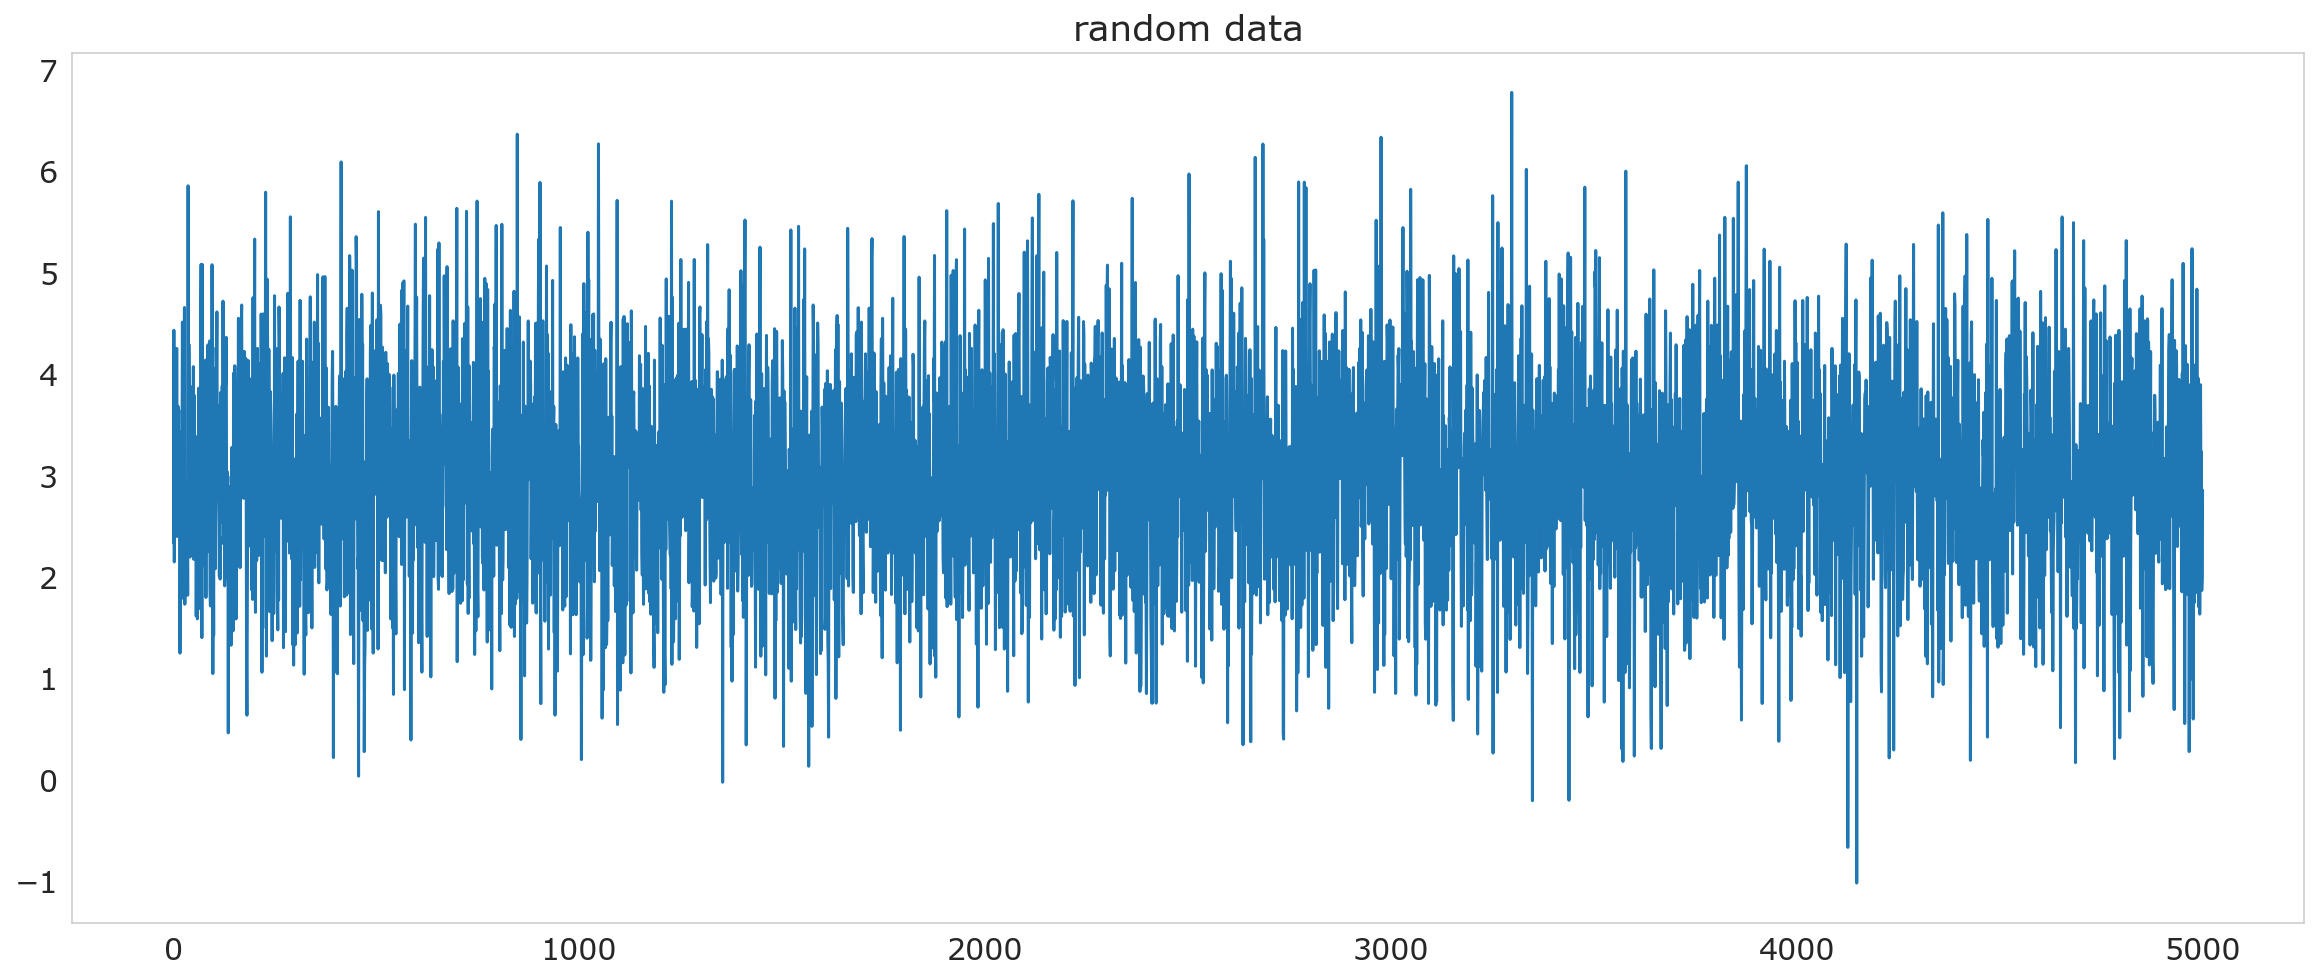

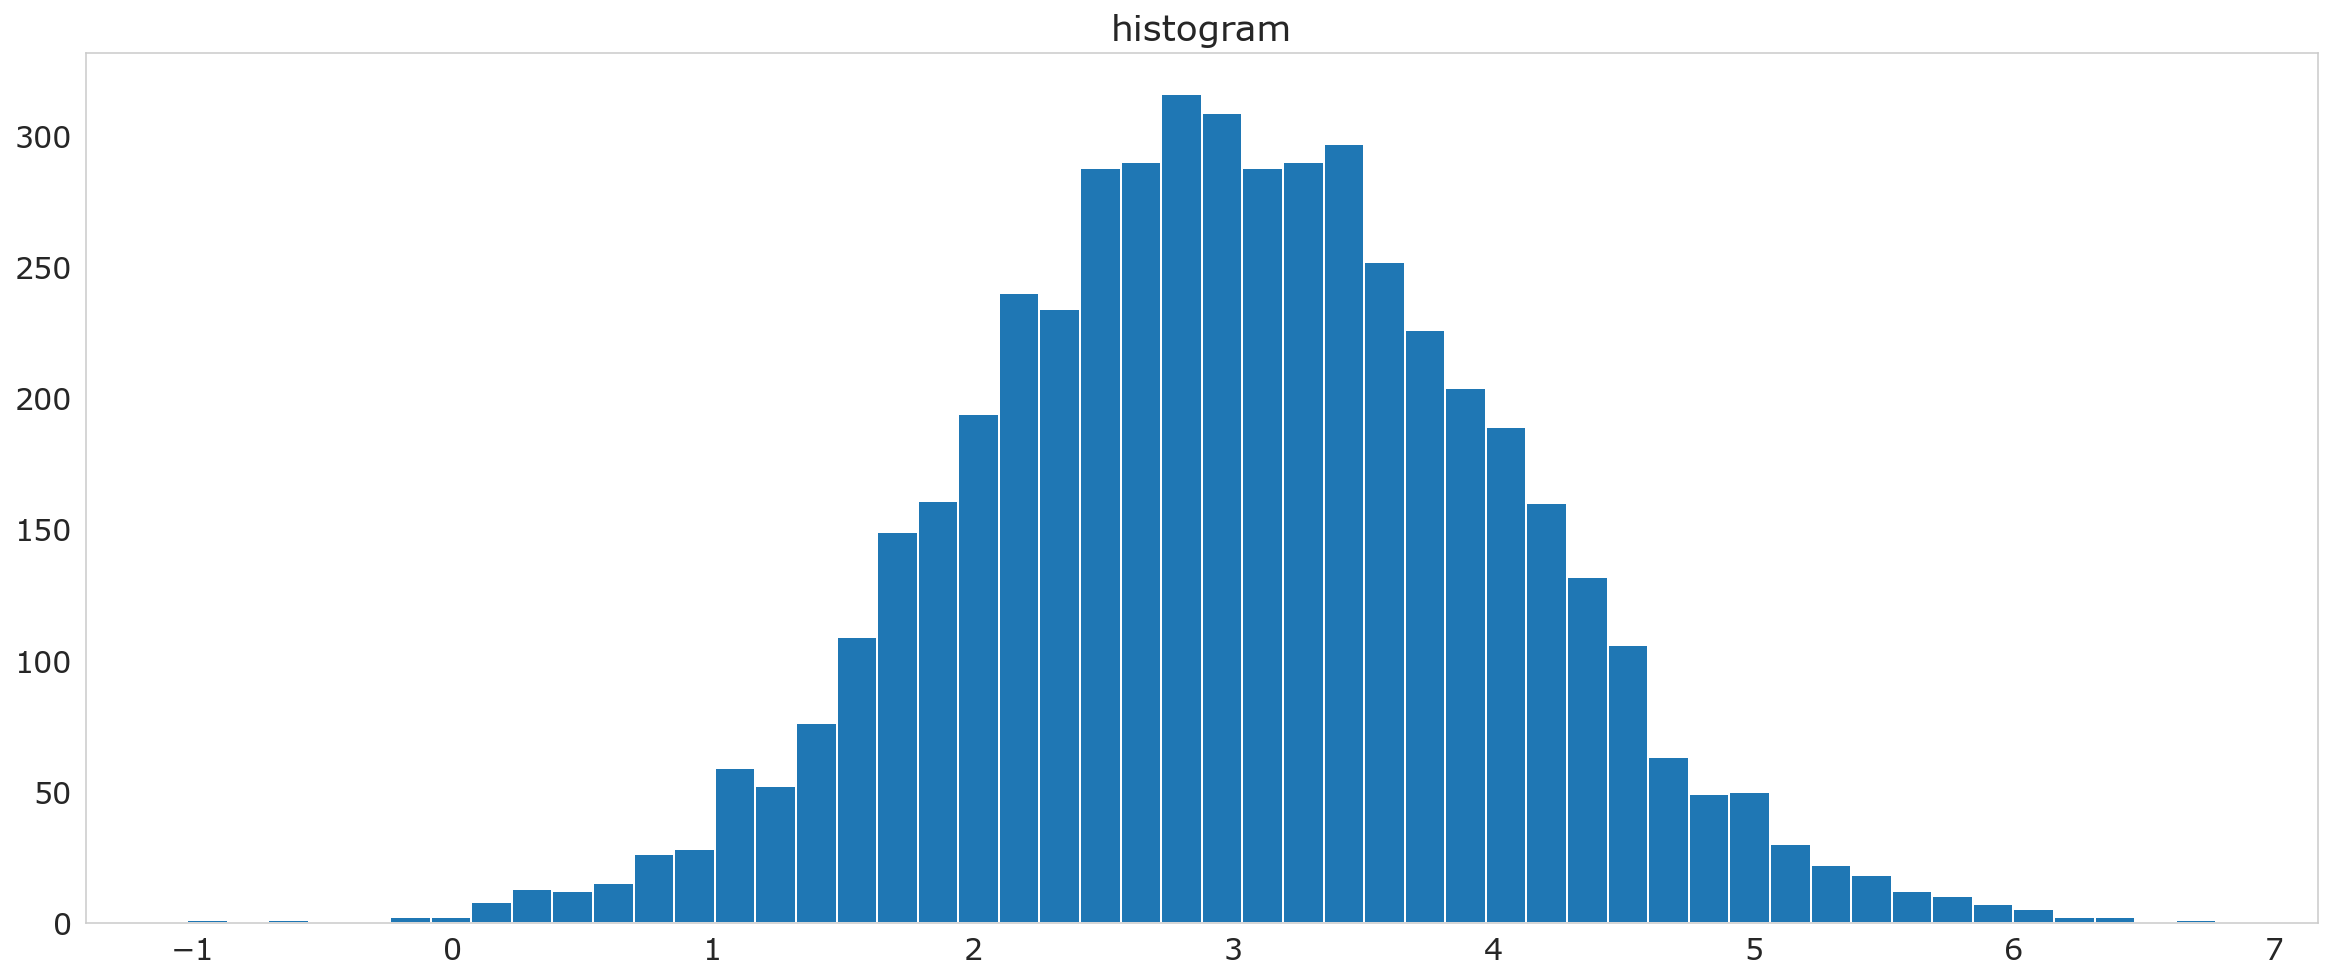

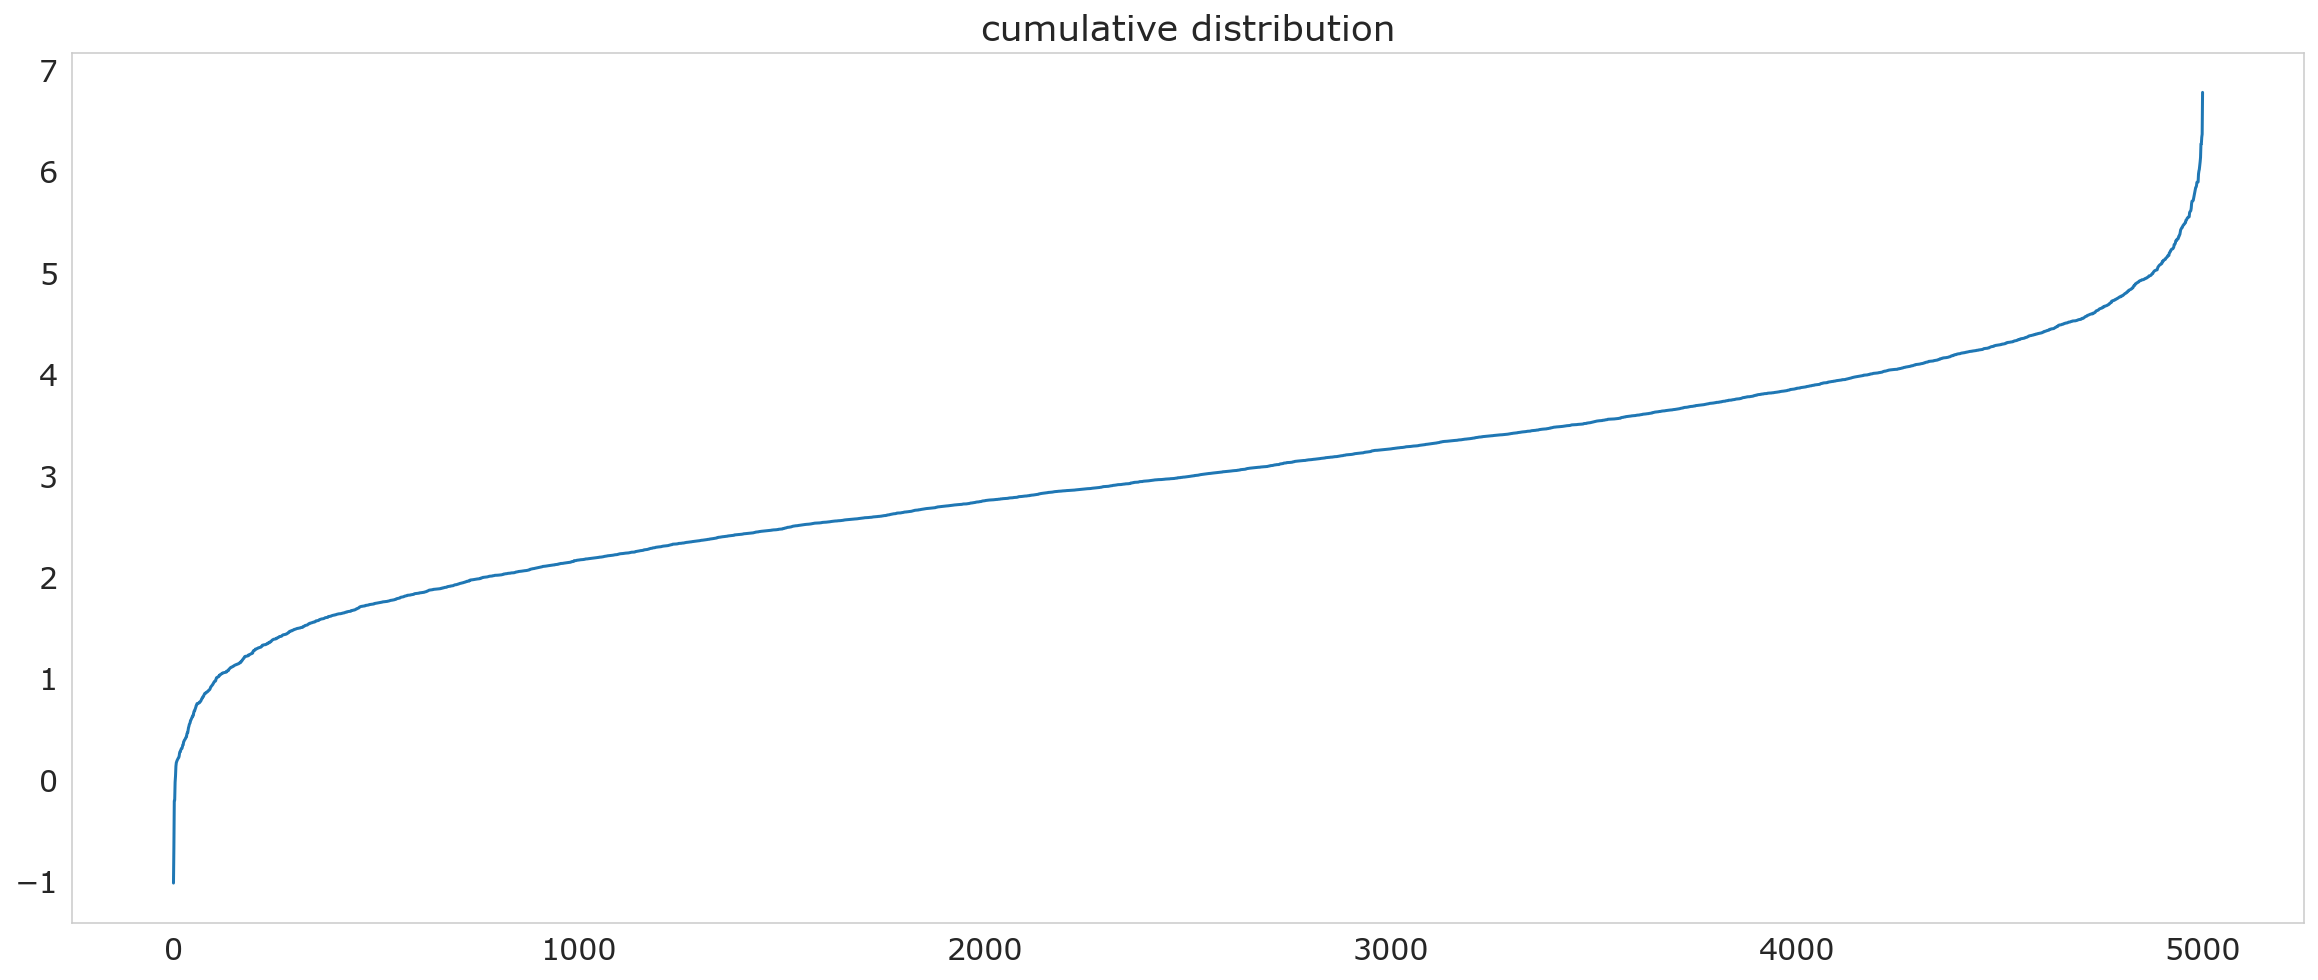

In [2]:
number_of_points_to_simulate = 5000
mean = 3.
std = 1.0

rnd_nrm = np.random.normal(mean, std, size=number_of_points_to_simulate)

plt.plot(rnd_nrm)
plt.title('random data')
plt.show()

plt.hist(rnd_nrm, 50);
plt.title('histogram')
plt.show()

plt.plot(np.sort(rnd_nrm))
plt.title('cumulative distribution')
plt.show()

## Next is the lognormal distribution, which is pretty much what is sounds like: the log of this is normally-distrubted, which you can see after log-transforming the results below.

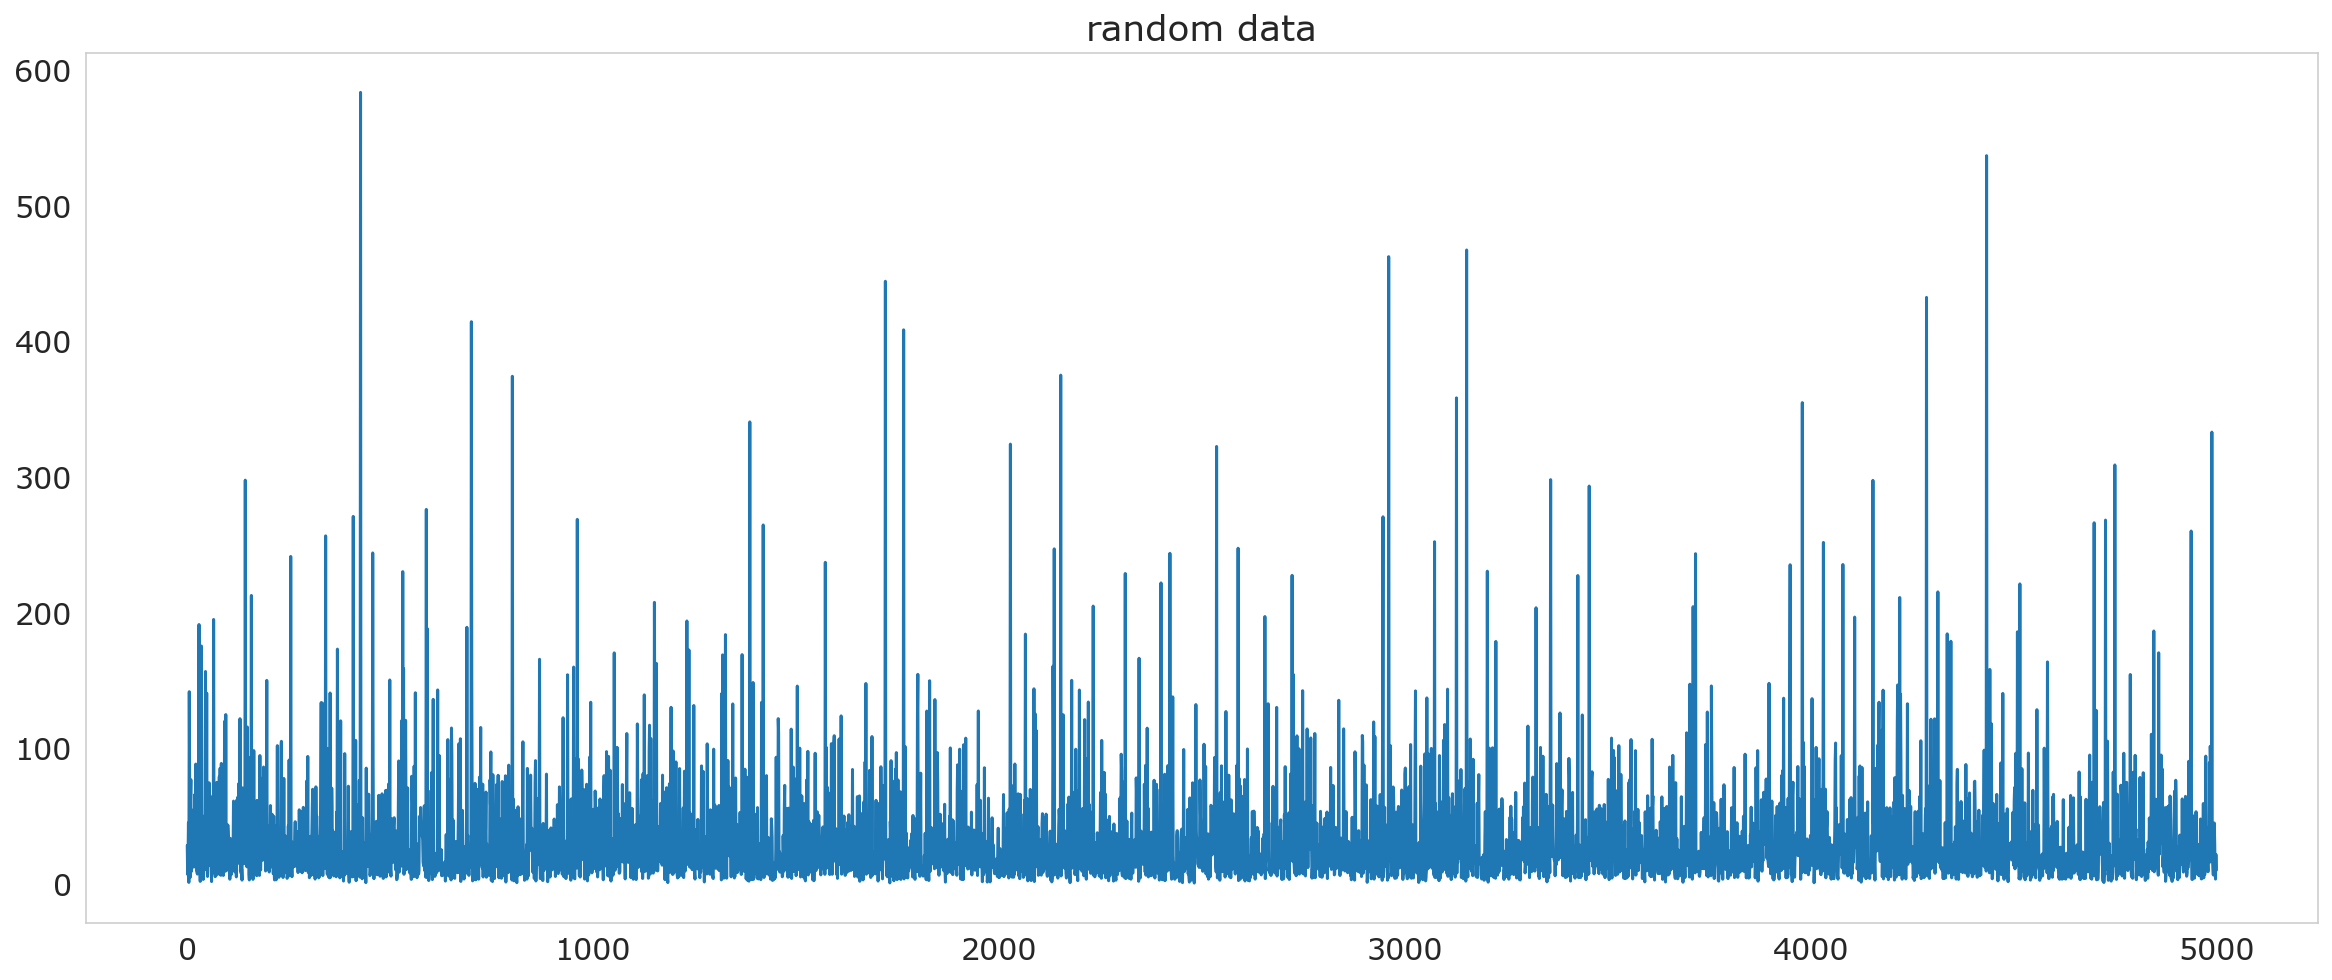

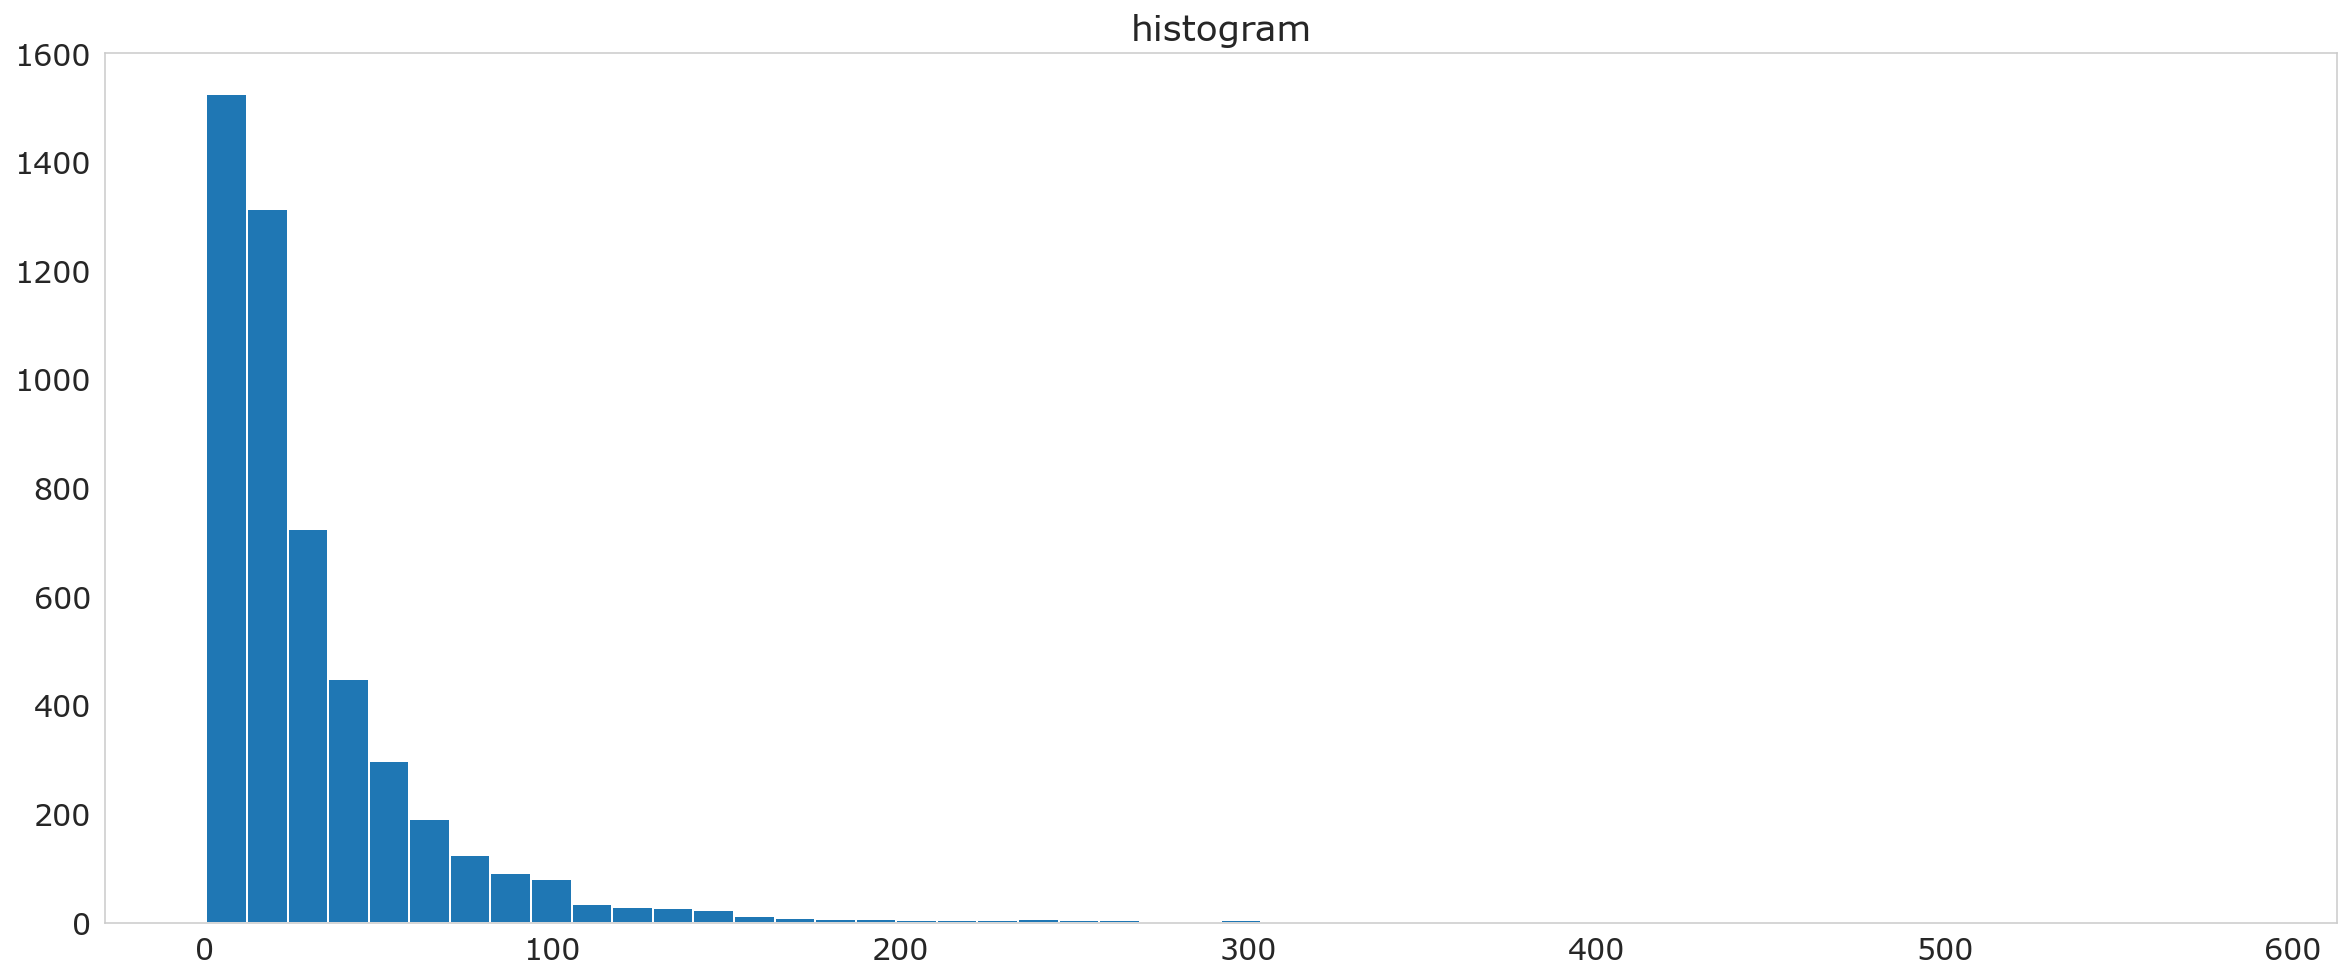

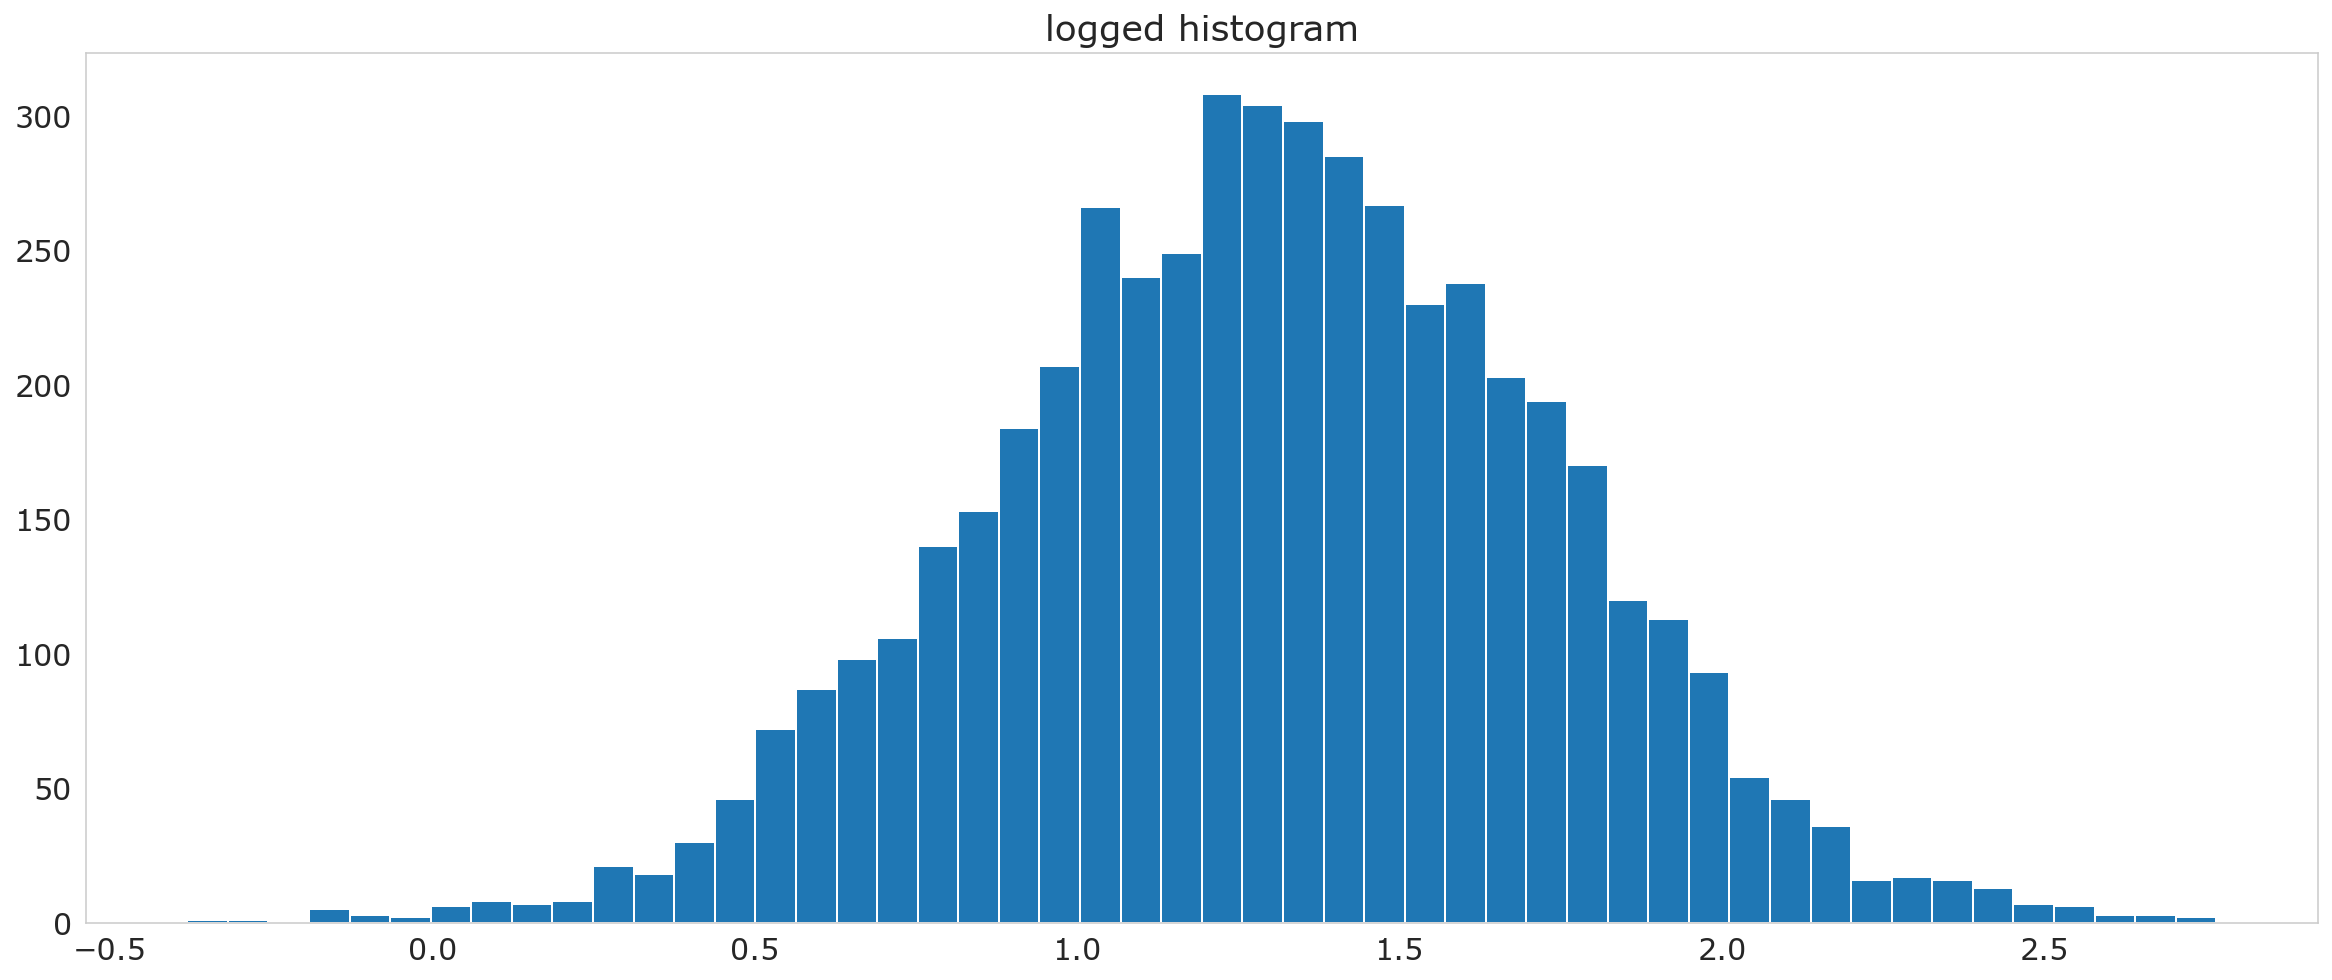

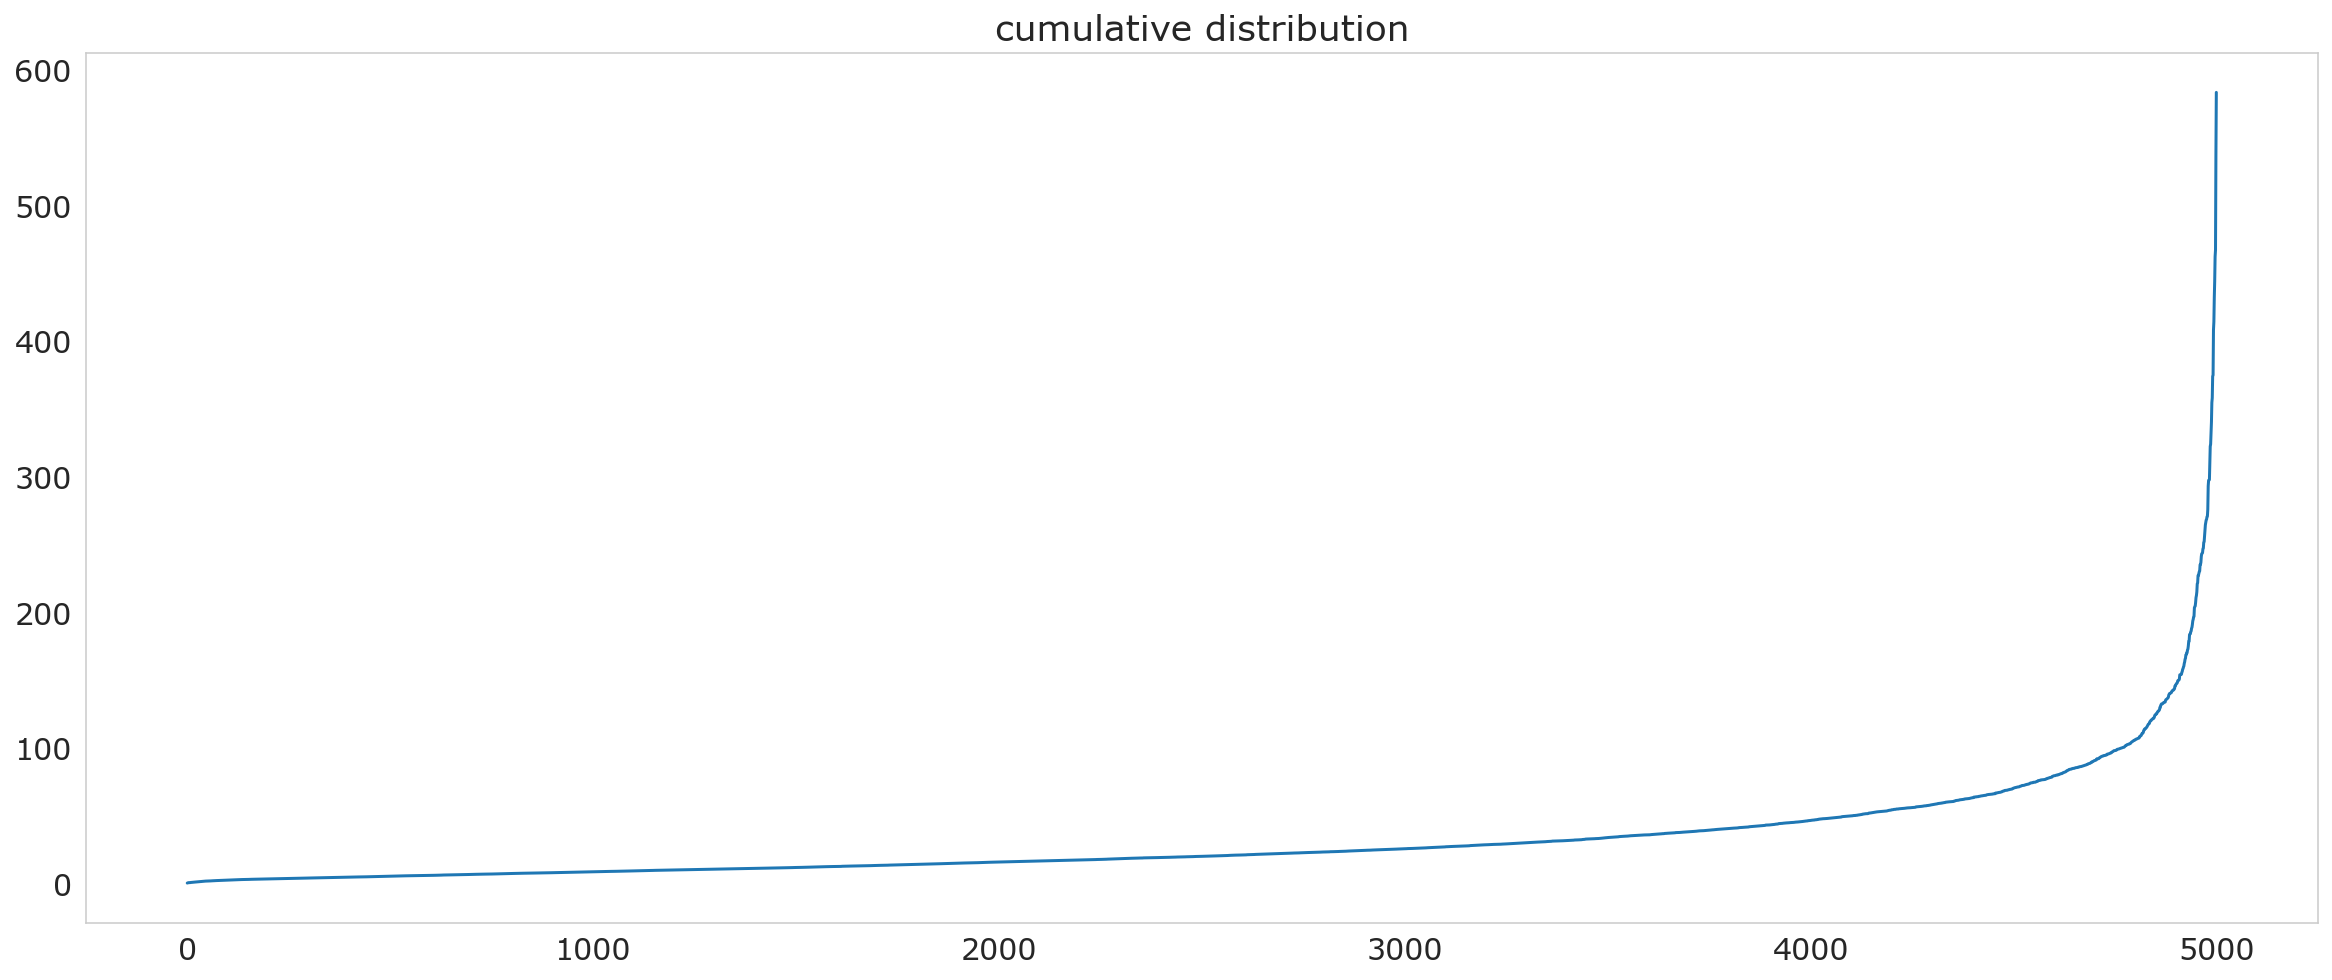

In [3]:
number_of_points_to_simulate = 5000
mean = 3.
std = 1.0

rnd_ln = np.random.lognormal(mean=mean, sigma=std, size=number_of_points_to_simulate)

plt.plot(rnd_ln)
plt.title('random data')
plt.show()

plt.hist(rnd_ln, 50);
plt.title('histogram')
plt.show()

plt.hist(np.log10(rnd_ln), 50);
plt.title('logged histogram')
plt.show()

plt.plot(np.sort(rnd_ln))
plt.title('cumulative distribution')
plt.show()


## Next up is the power law distribution, which is defined as:

$y = x^k$

## where $k$ is a constant. This means that this distribution is defined by only one parameter.

## You can see that, when plotted in log-log space, the cumulative dsitrubution of power law data are close to linear.

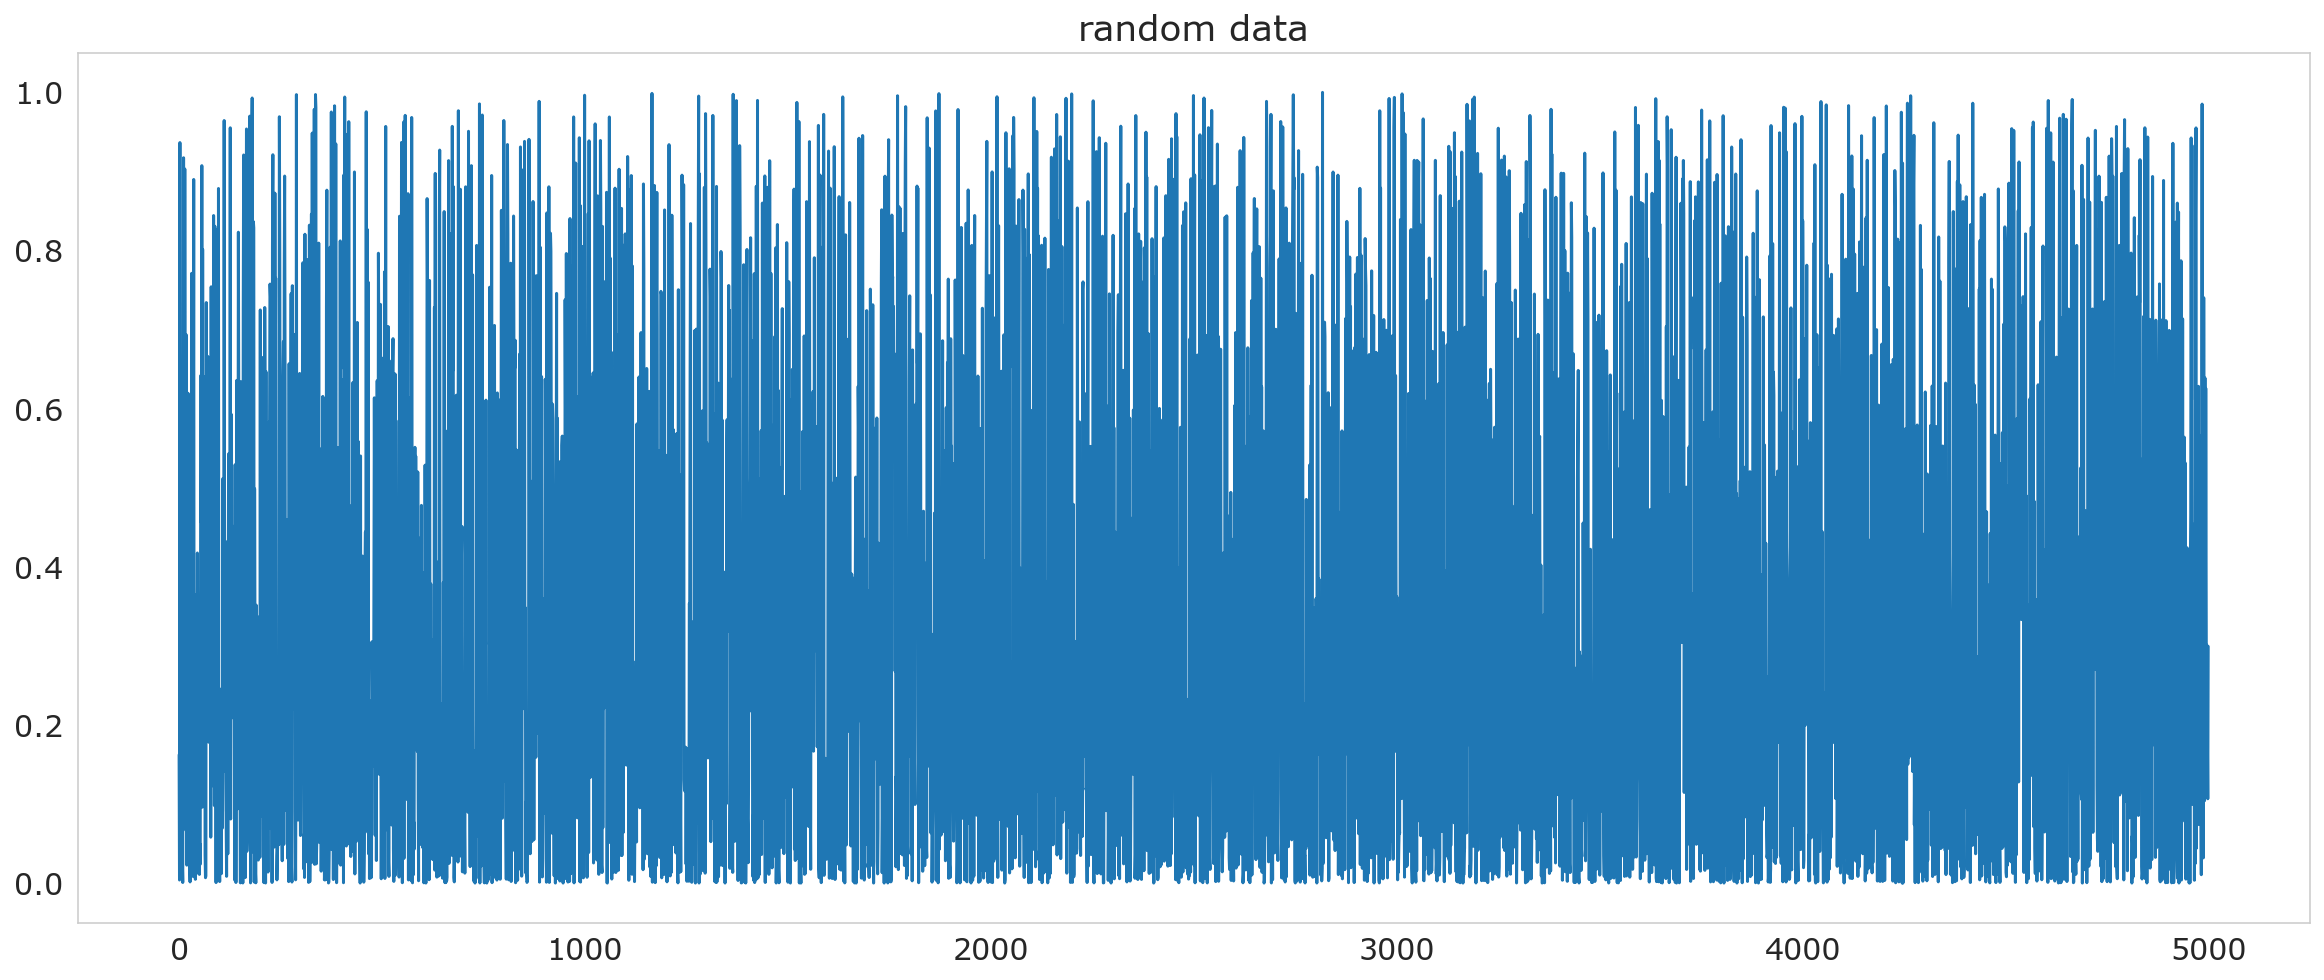

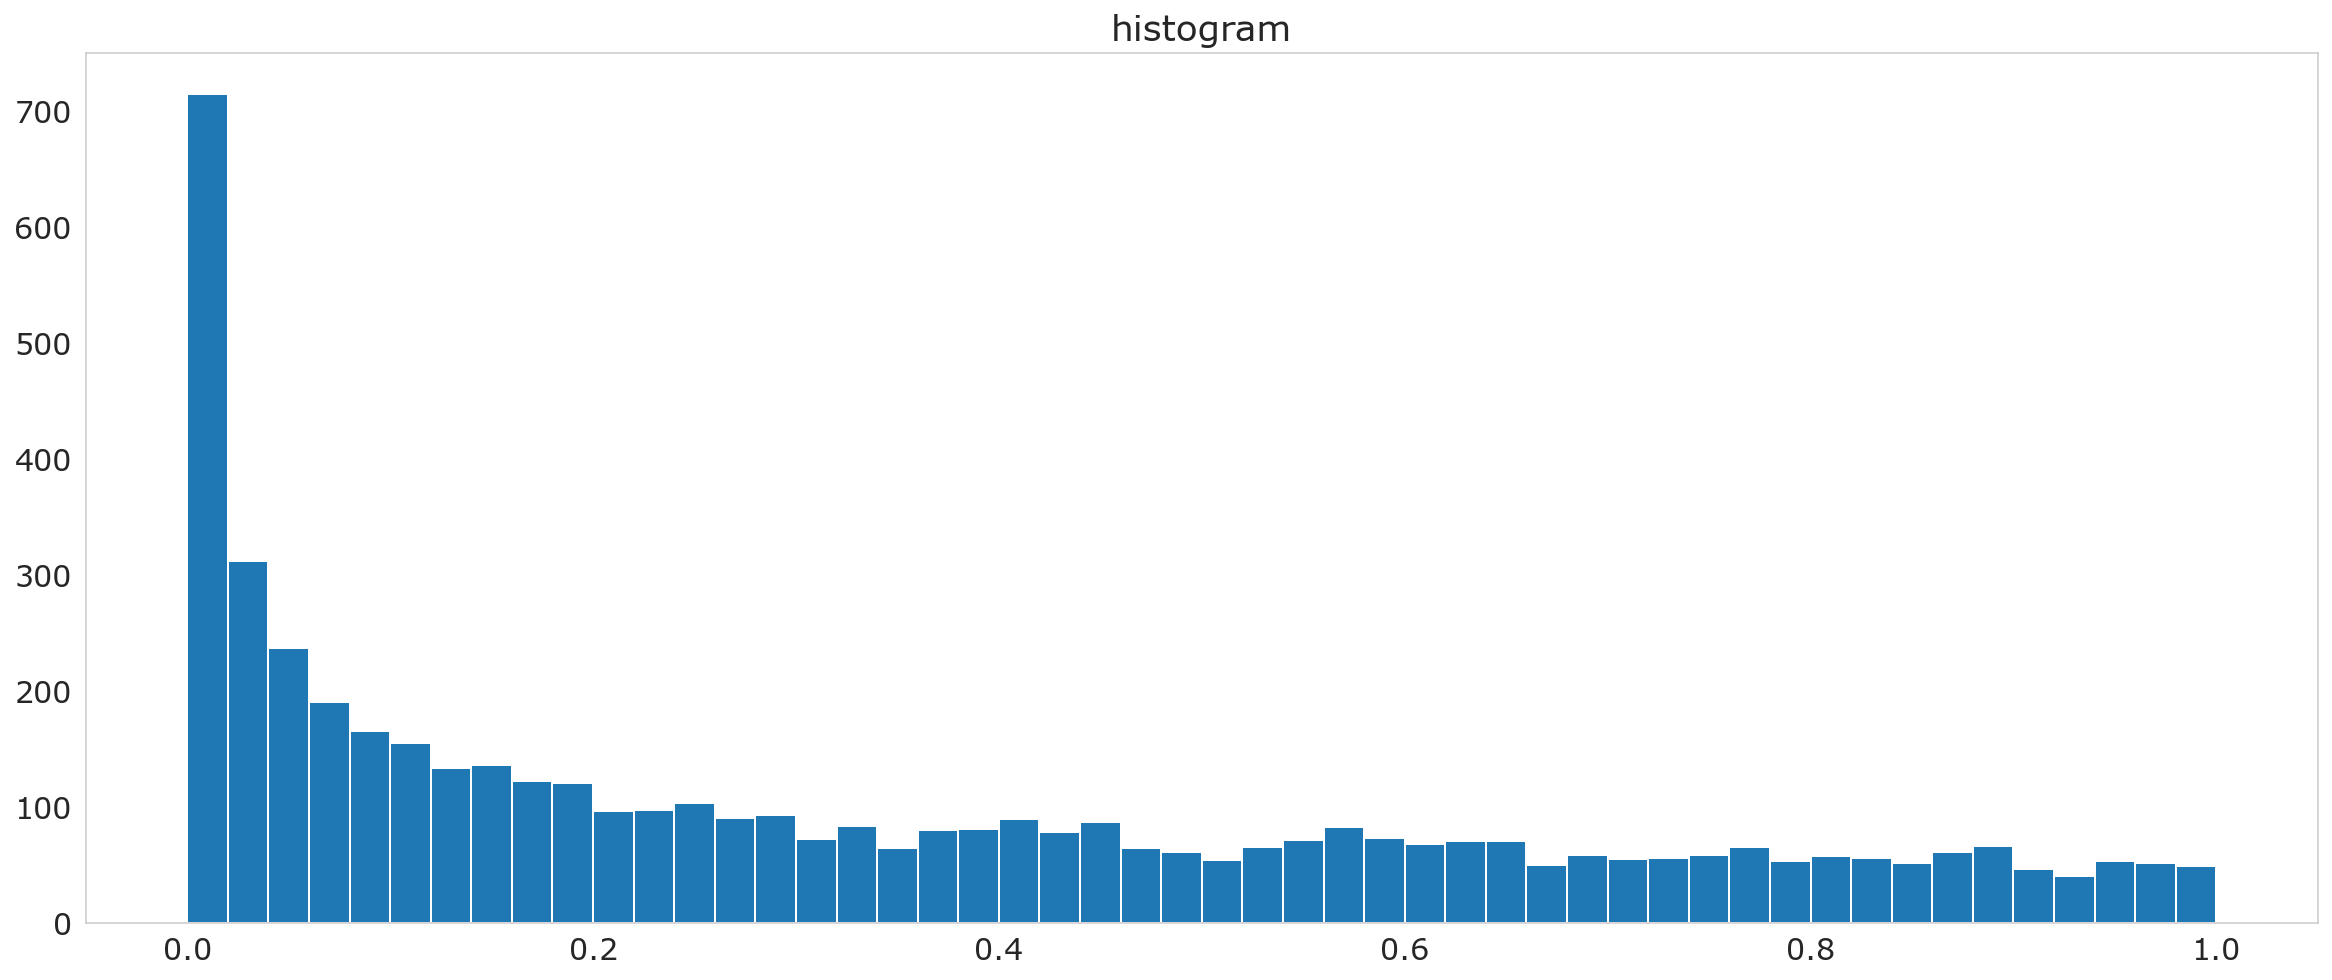

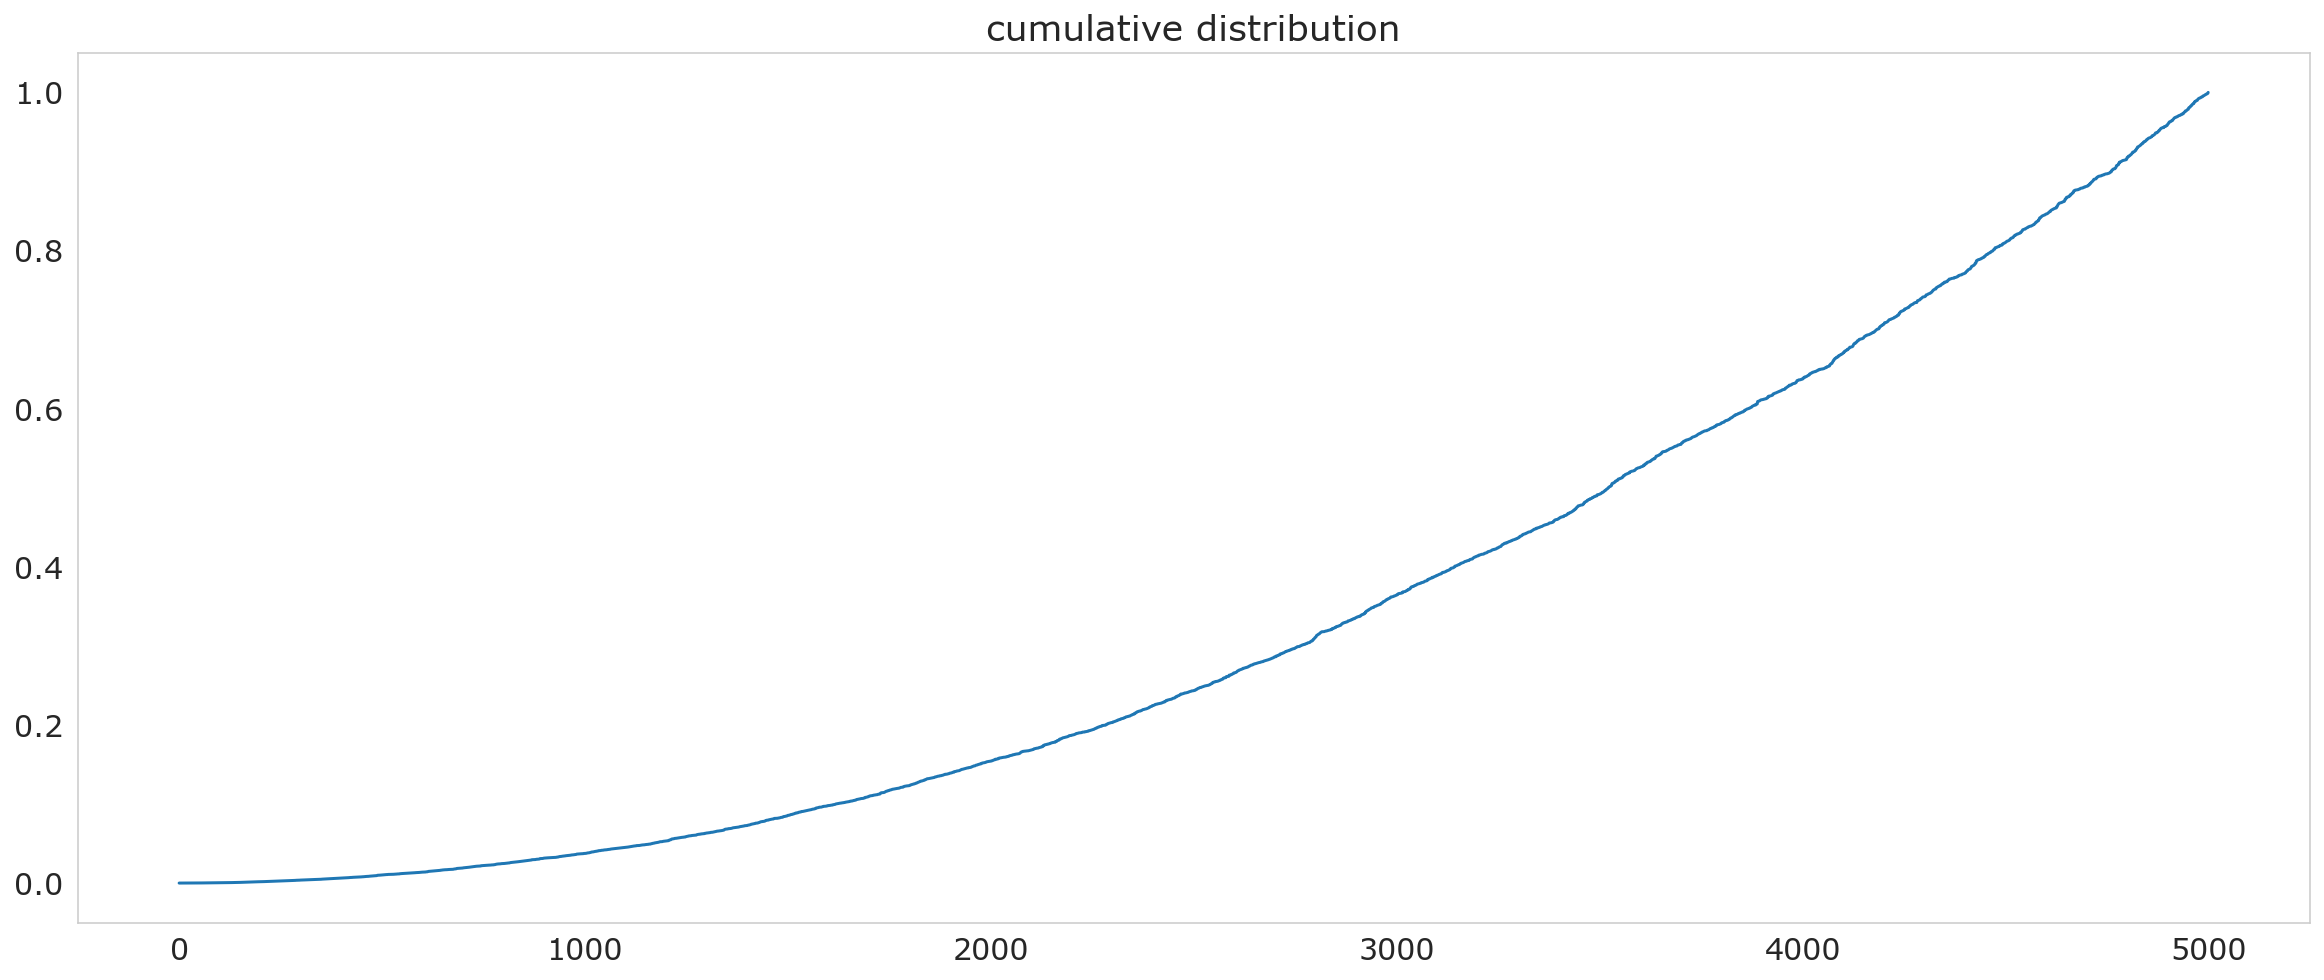

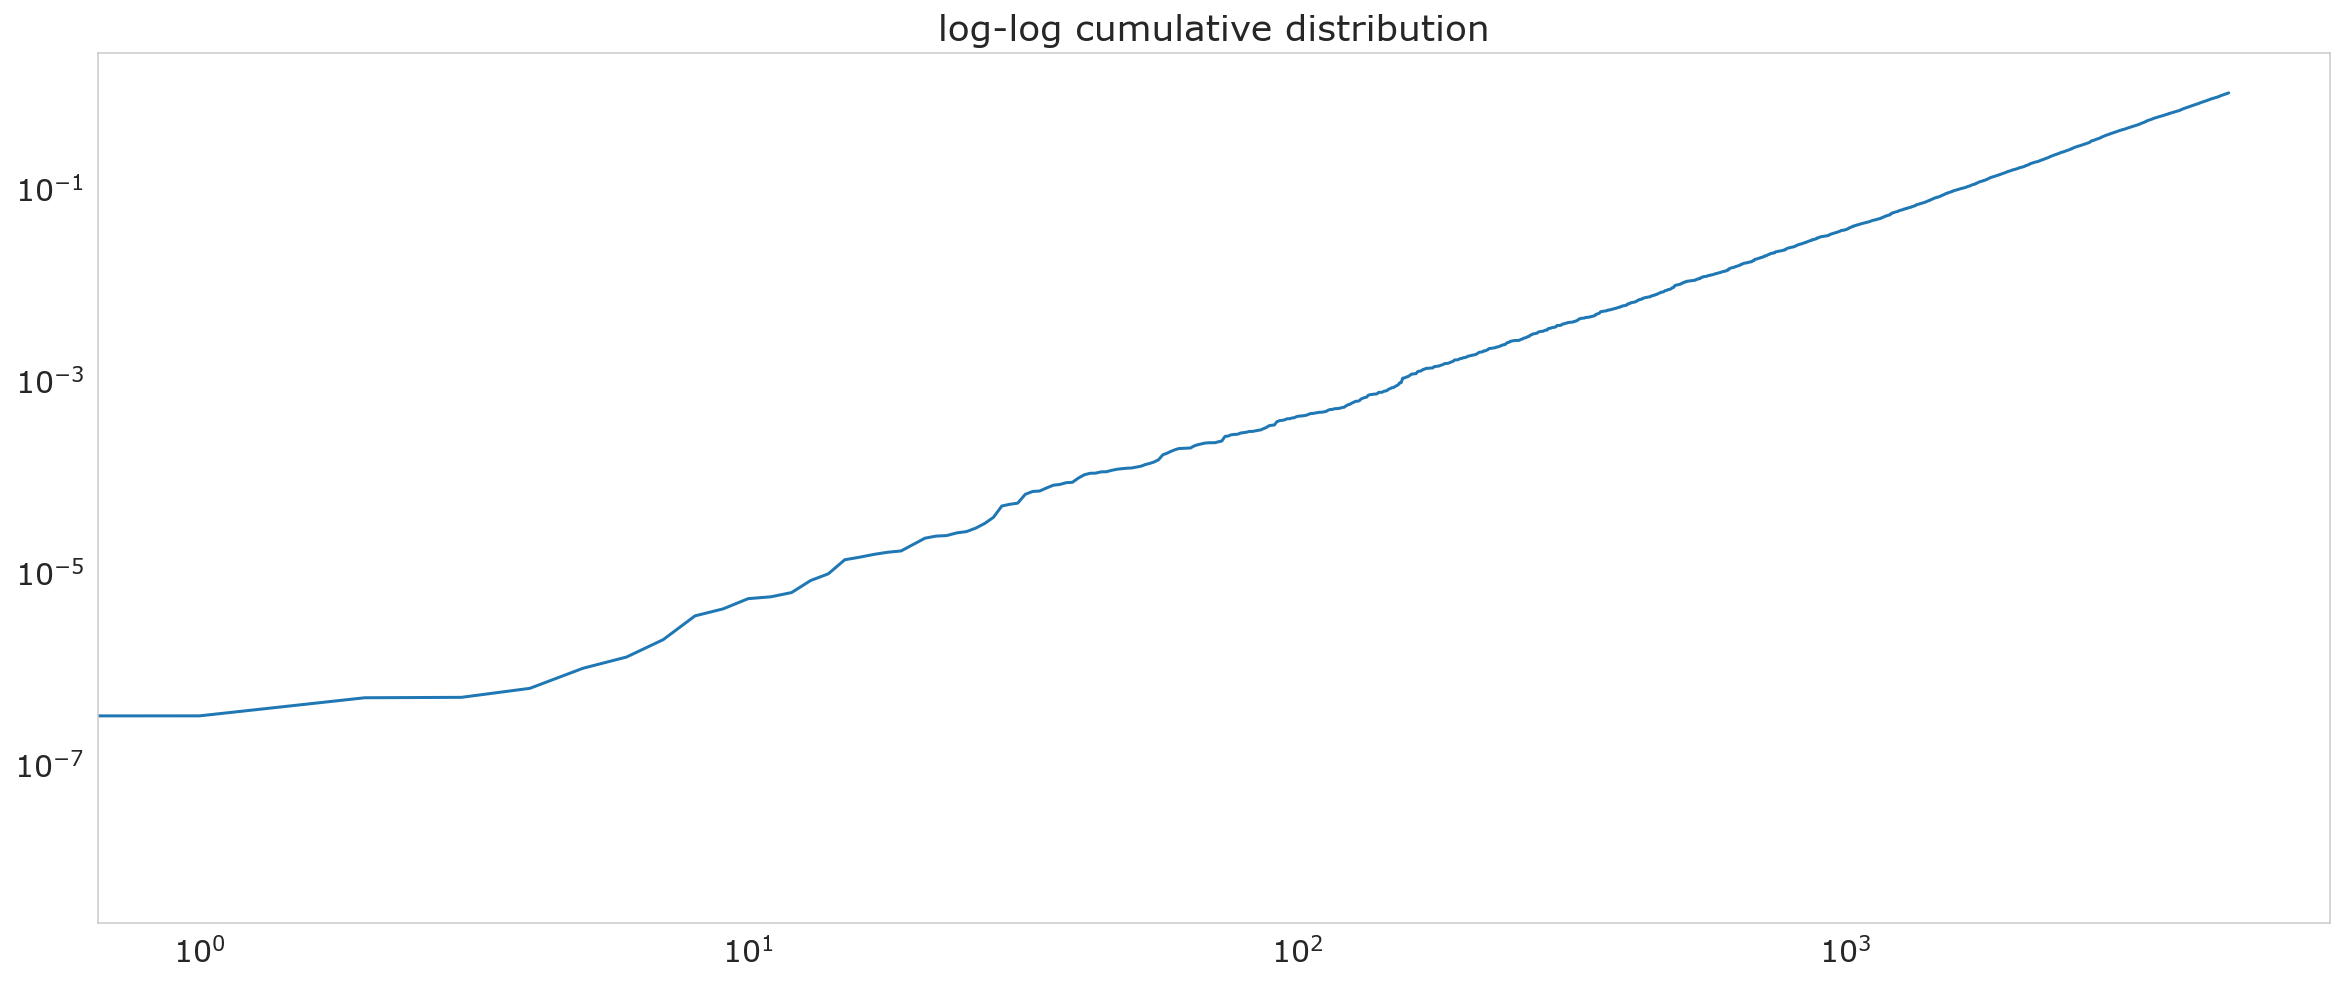

In [4]:
number_of_points_to_simulate = 5000
k = 0.5

rnd_pow = np.random.power(k, size=number_of_points_to_simulate)

plt.plot(rnd_pow)
plt.title('random data')
plt.show()

plt.hist(rnd_pow, 50);
plt.title('histogram')
plt.show()

plt.plot(np.sort(rnd_pow))
plt.title('cumulative distribution')
plt.show()

plt.plot(np.sort(rnd_pow))
plt.xscale('log')
plt.yscale('log')
plt.title('log-log cumulative distribution')
plt.show()

## Then there is the exponential distribtion, which is closely related to the power law distribution. But where in the power law, the data is:

$y = x^k$

## where $k$ is the constant, for the exponential distribution, the data are:

$y = k^x$

## where the data are to the $x^{th}$ power.

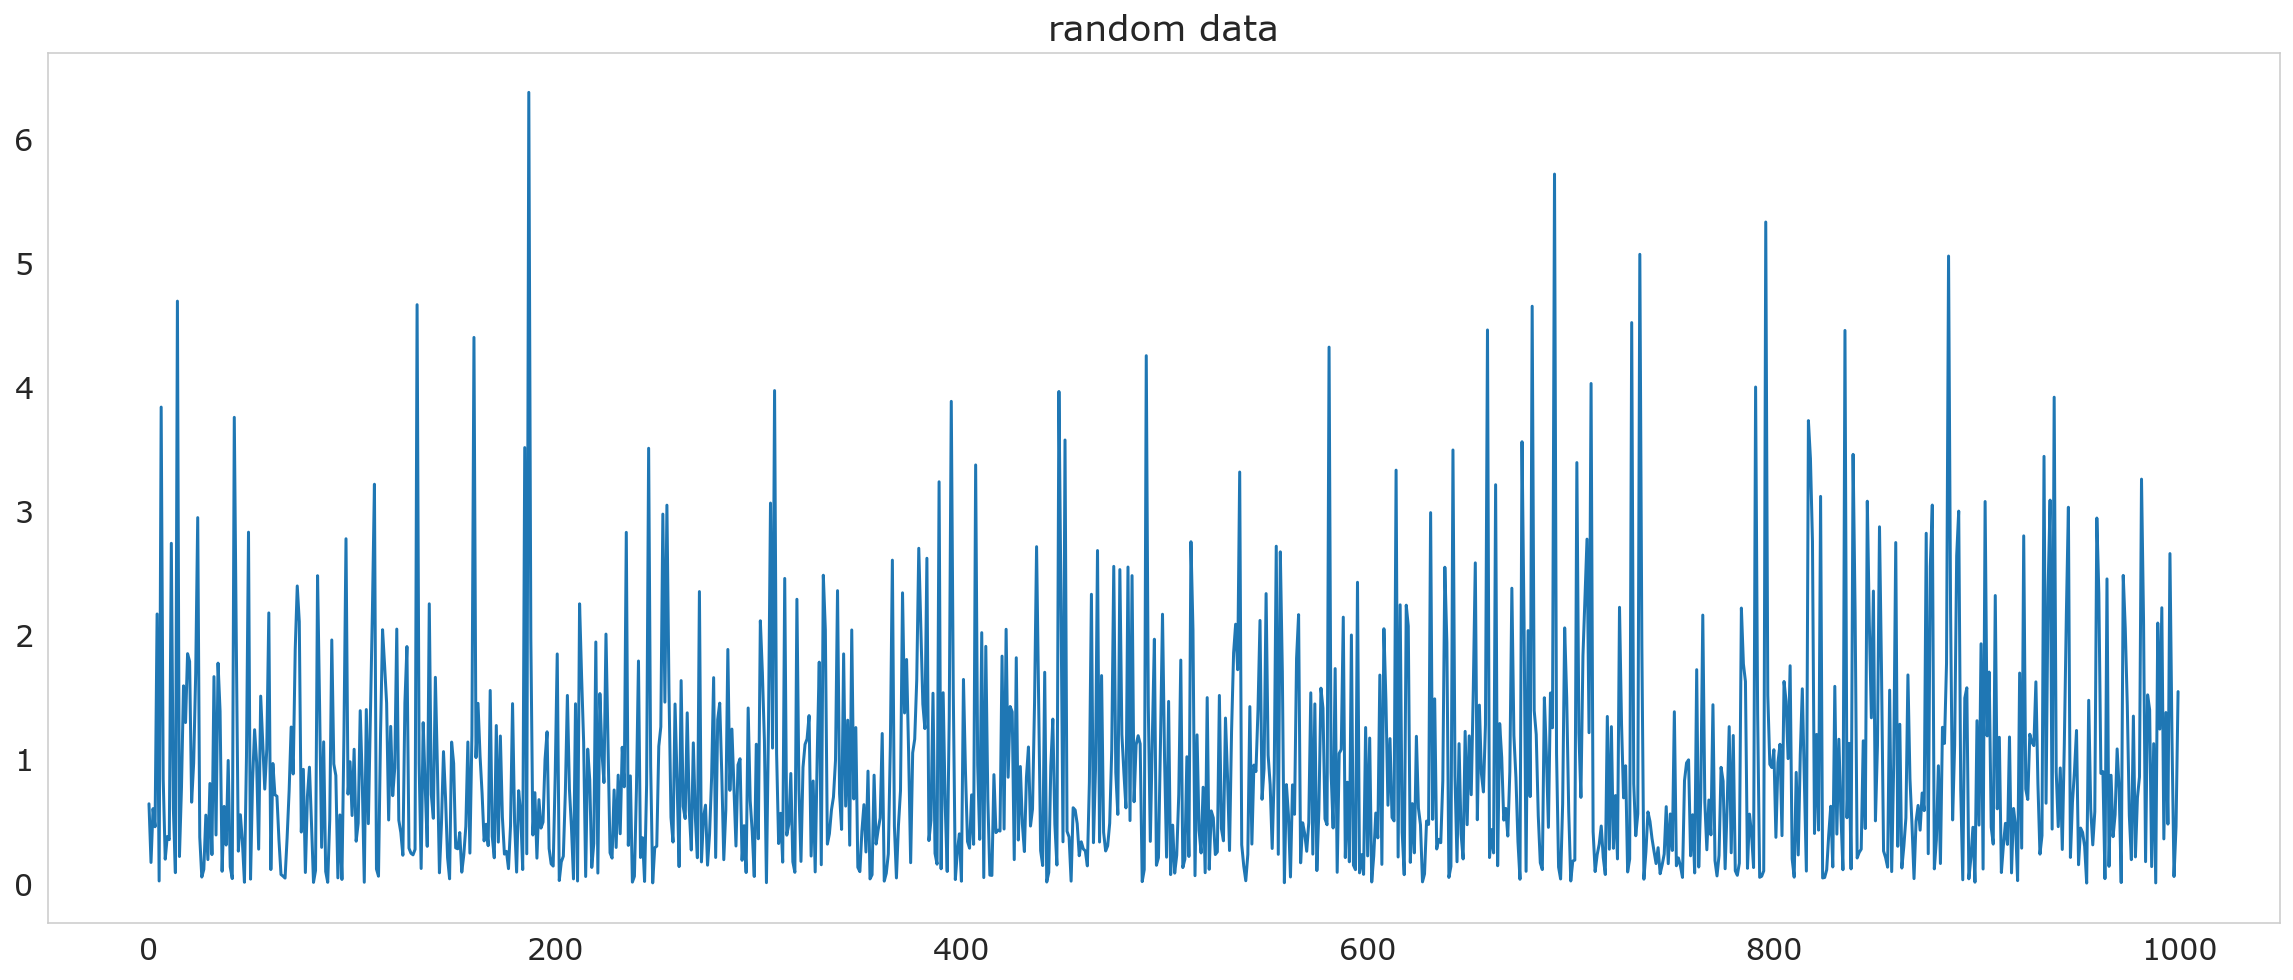

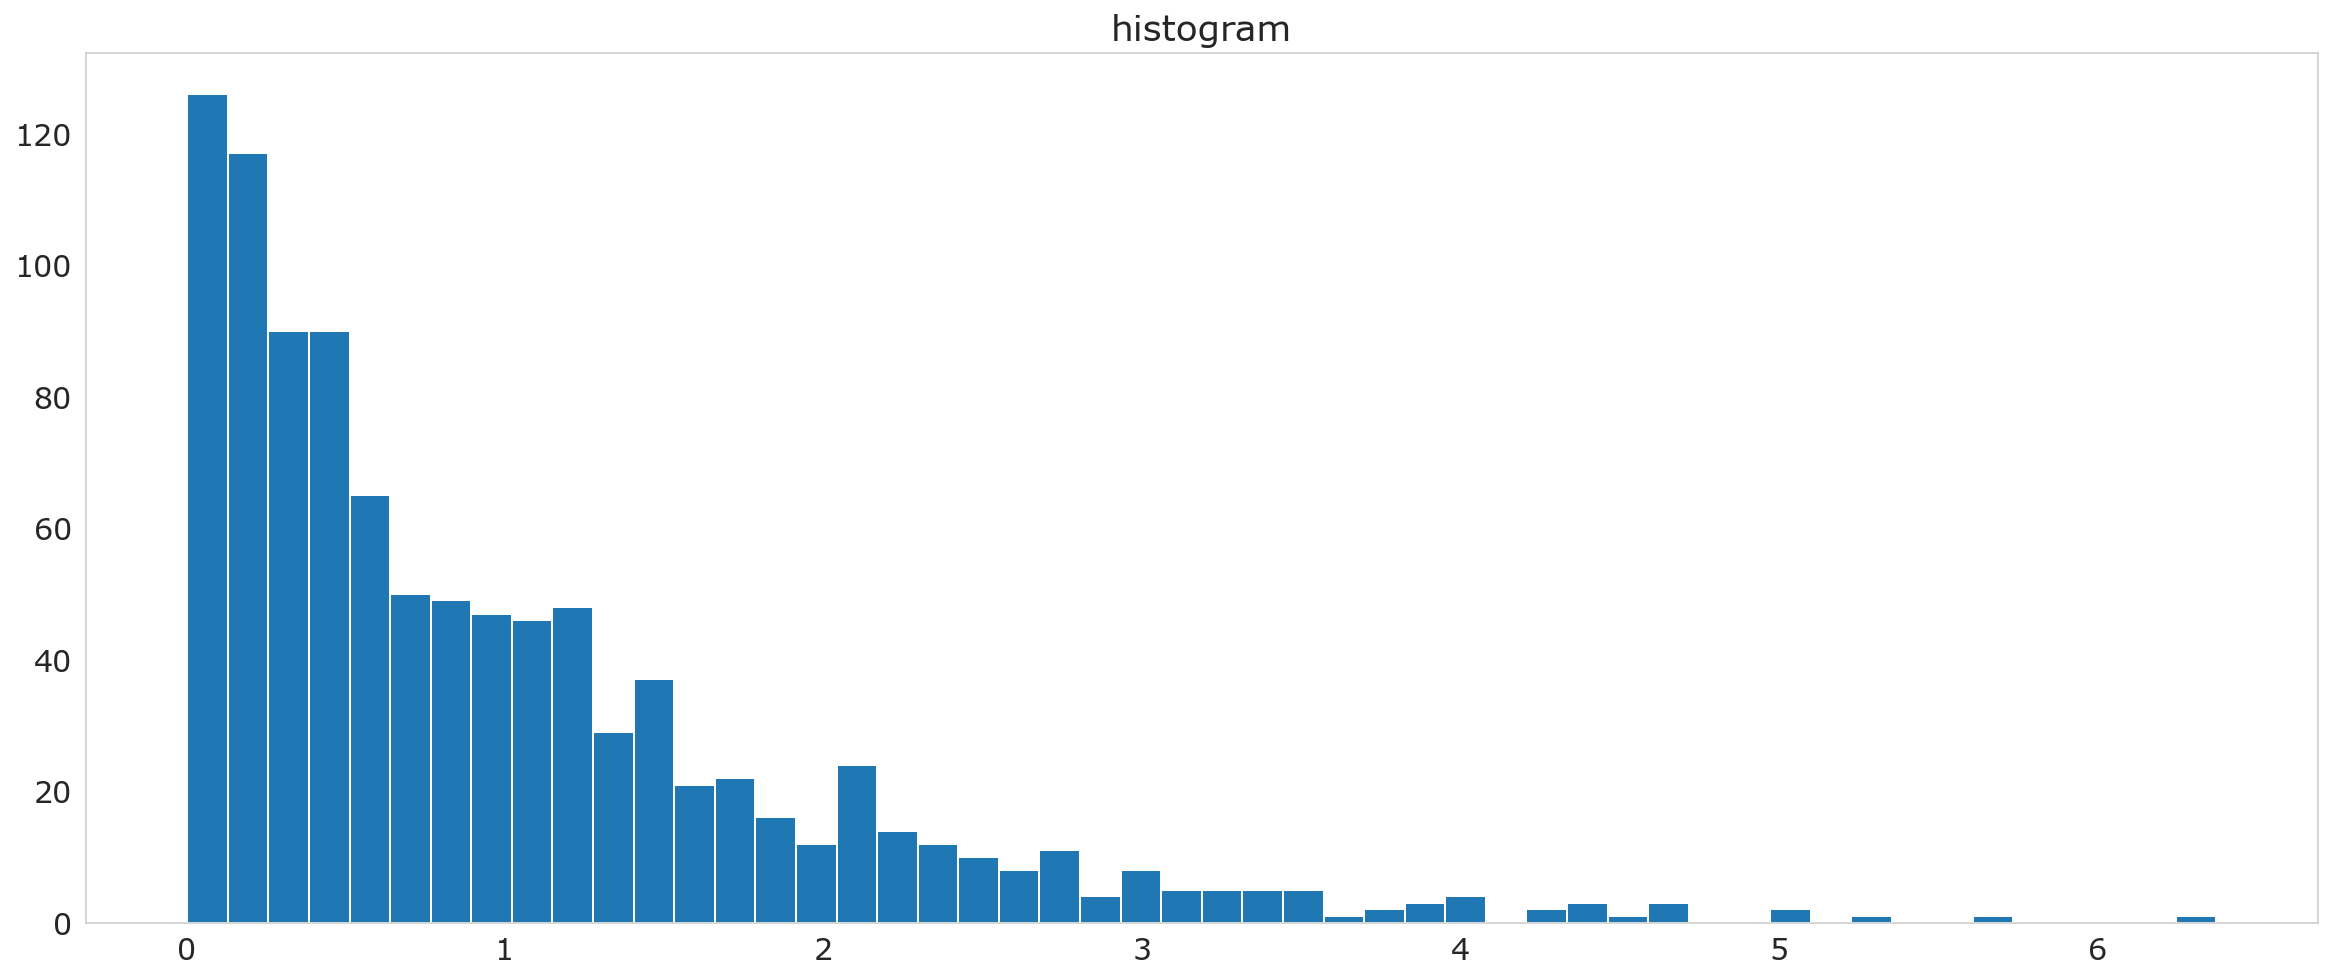

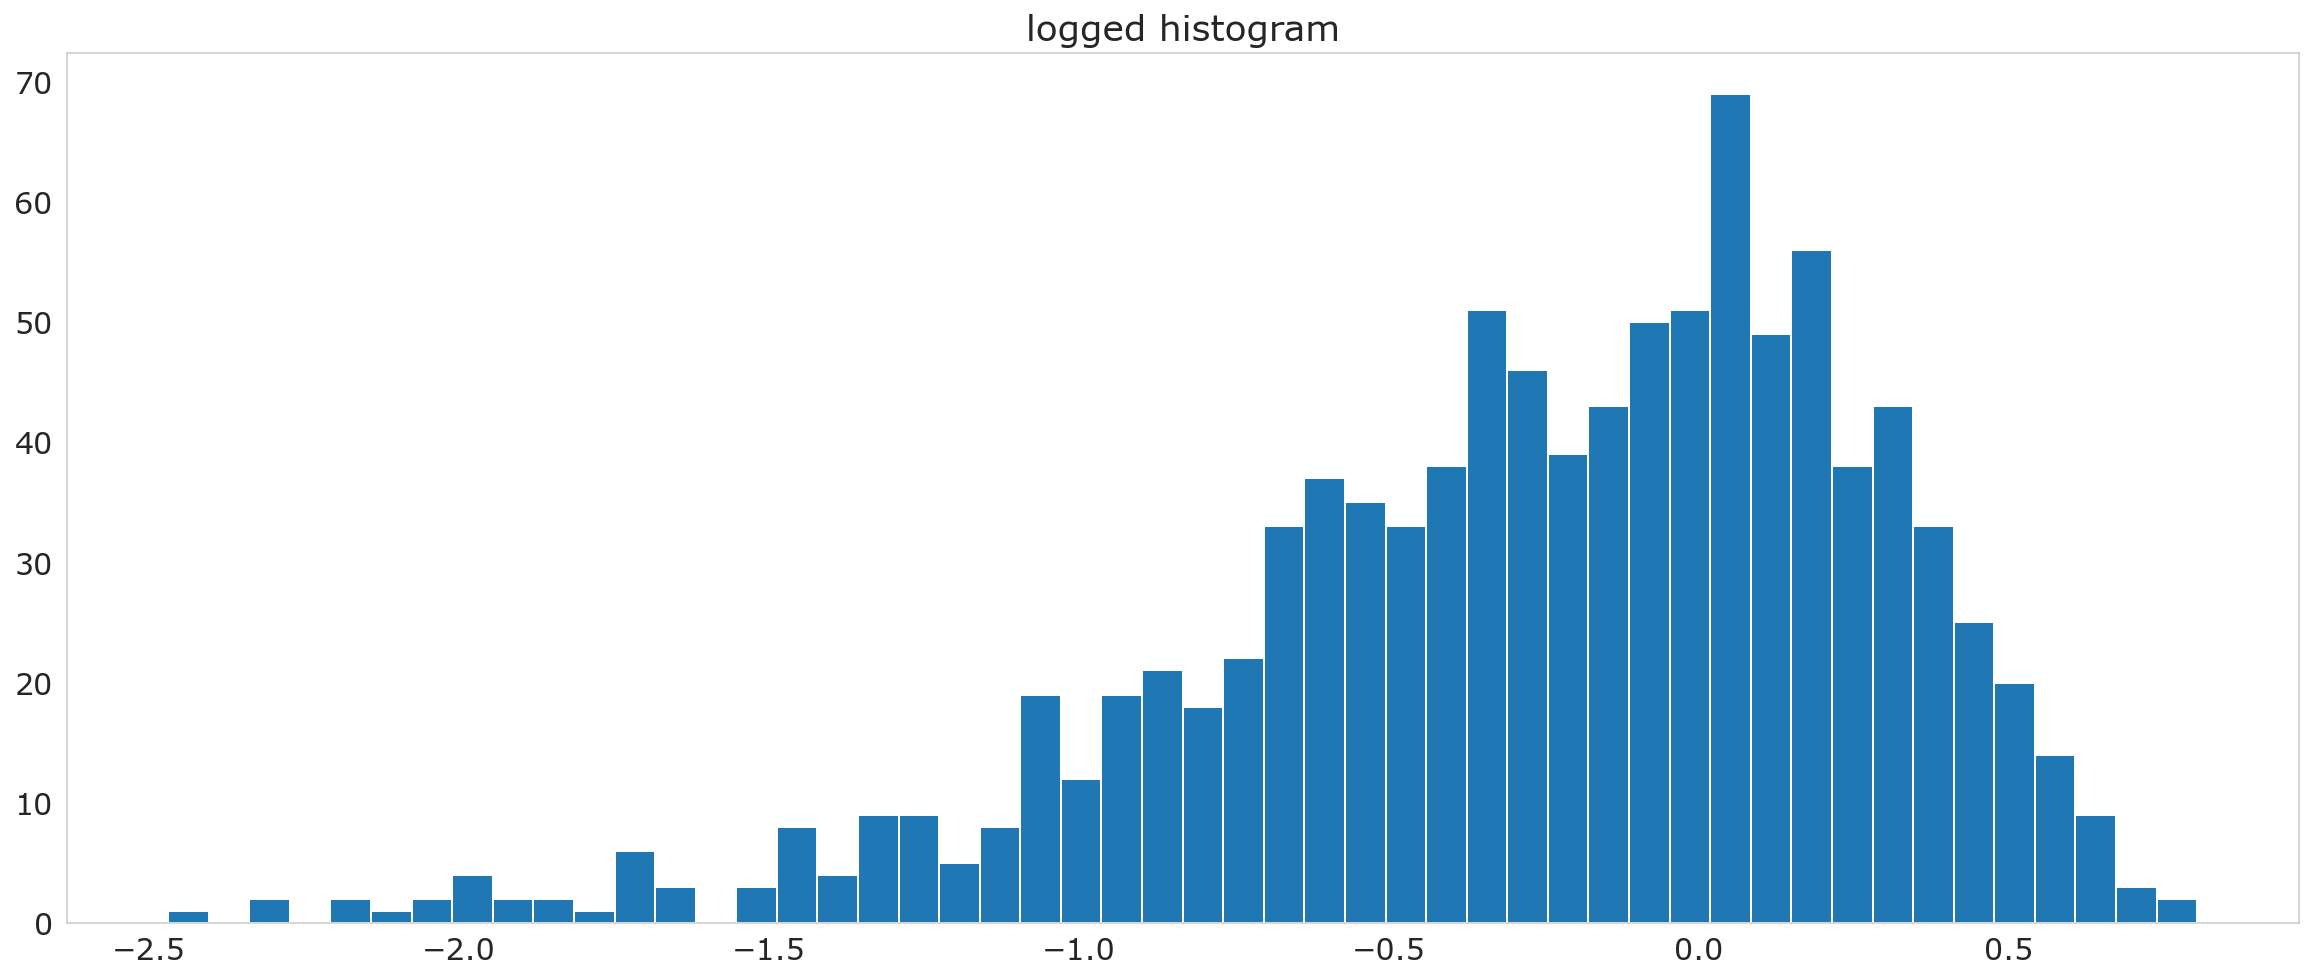

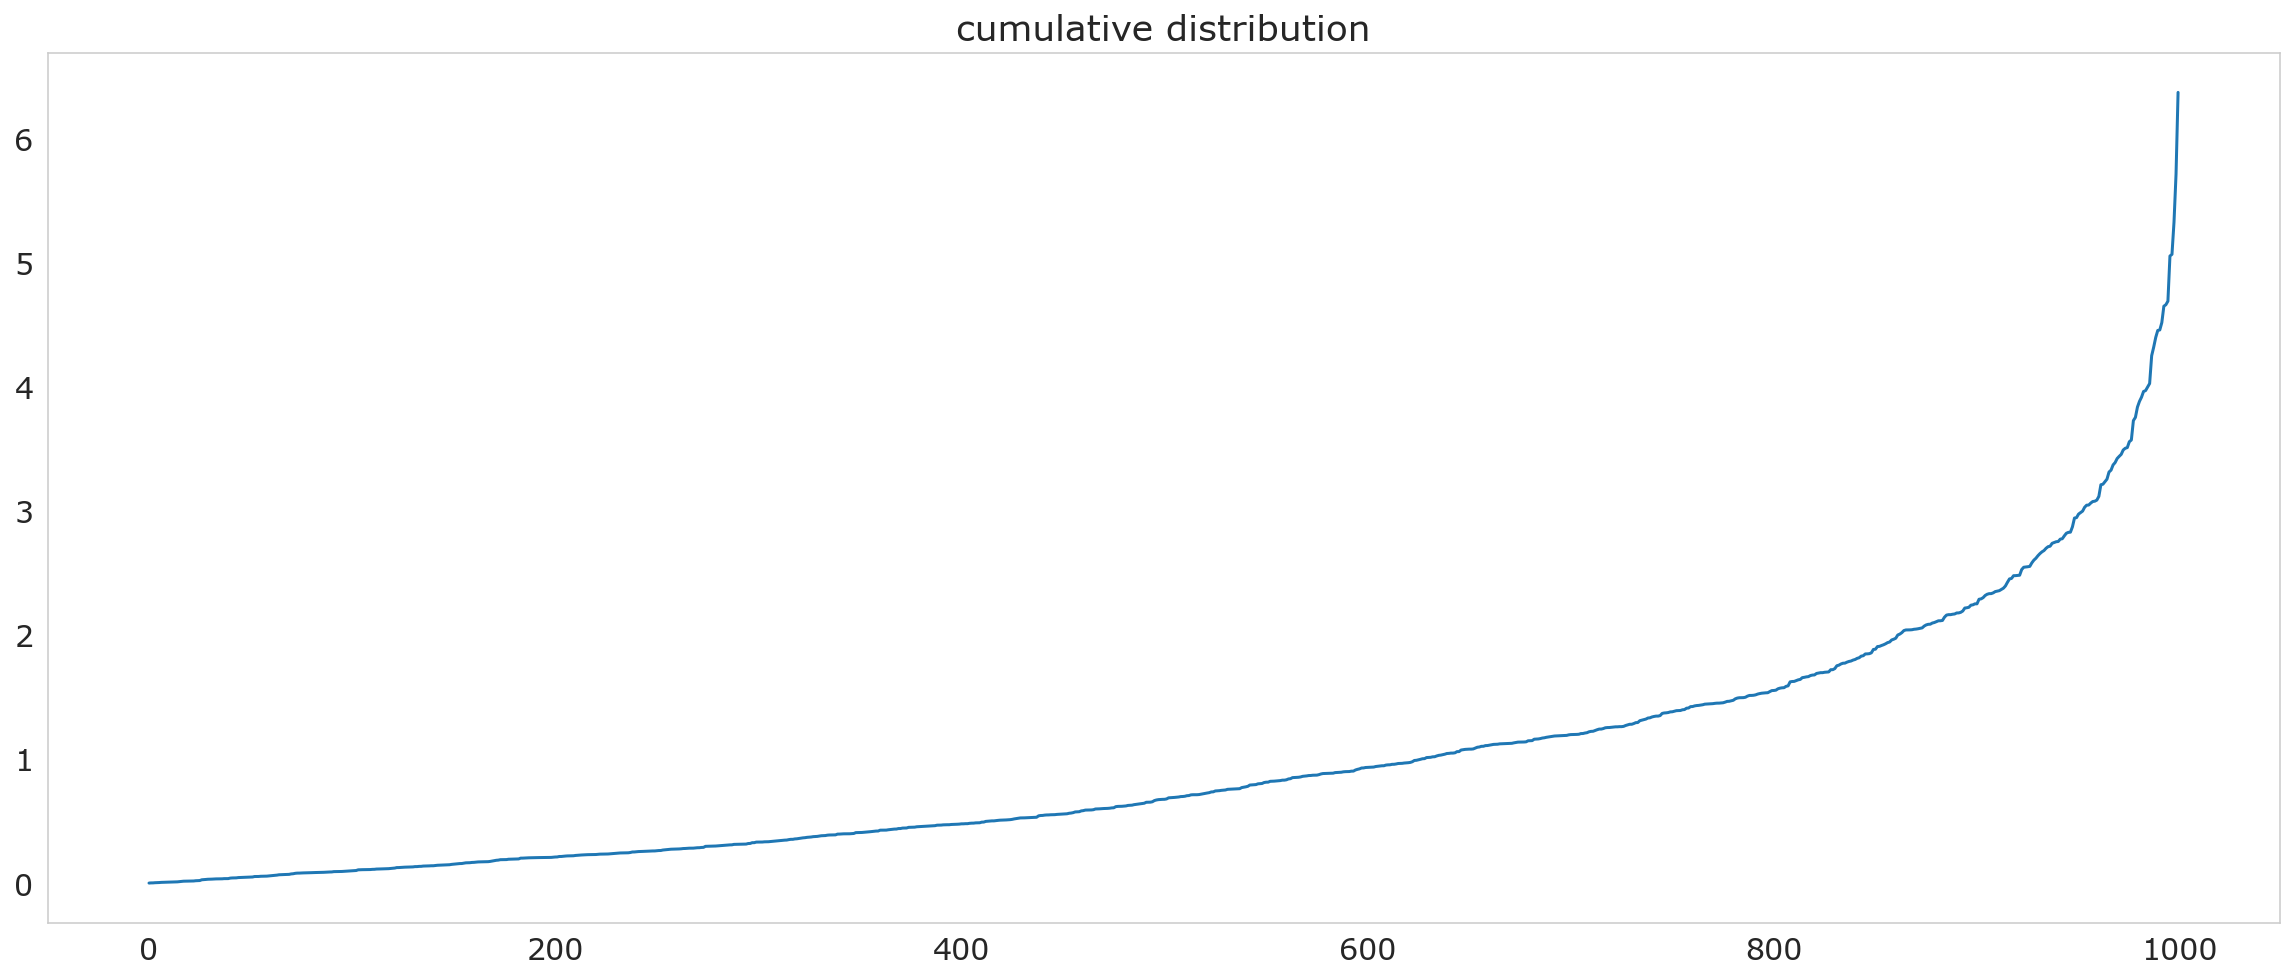

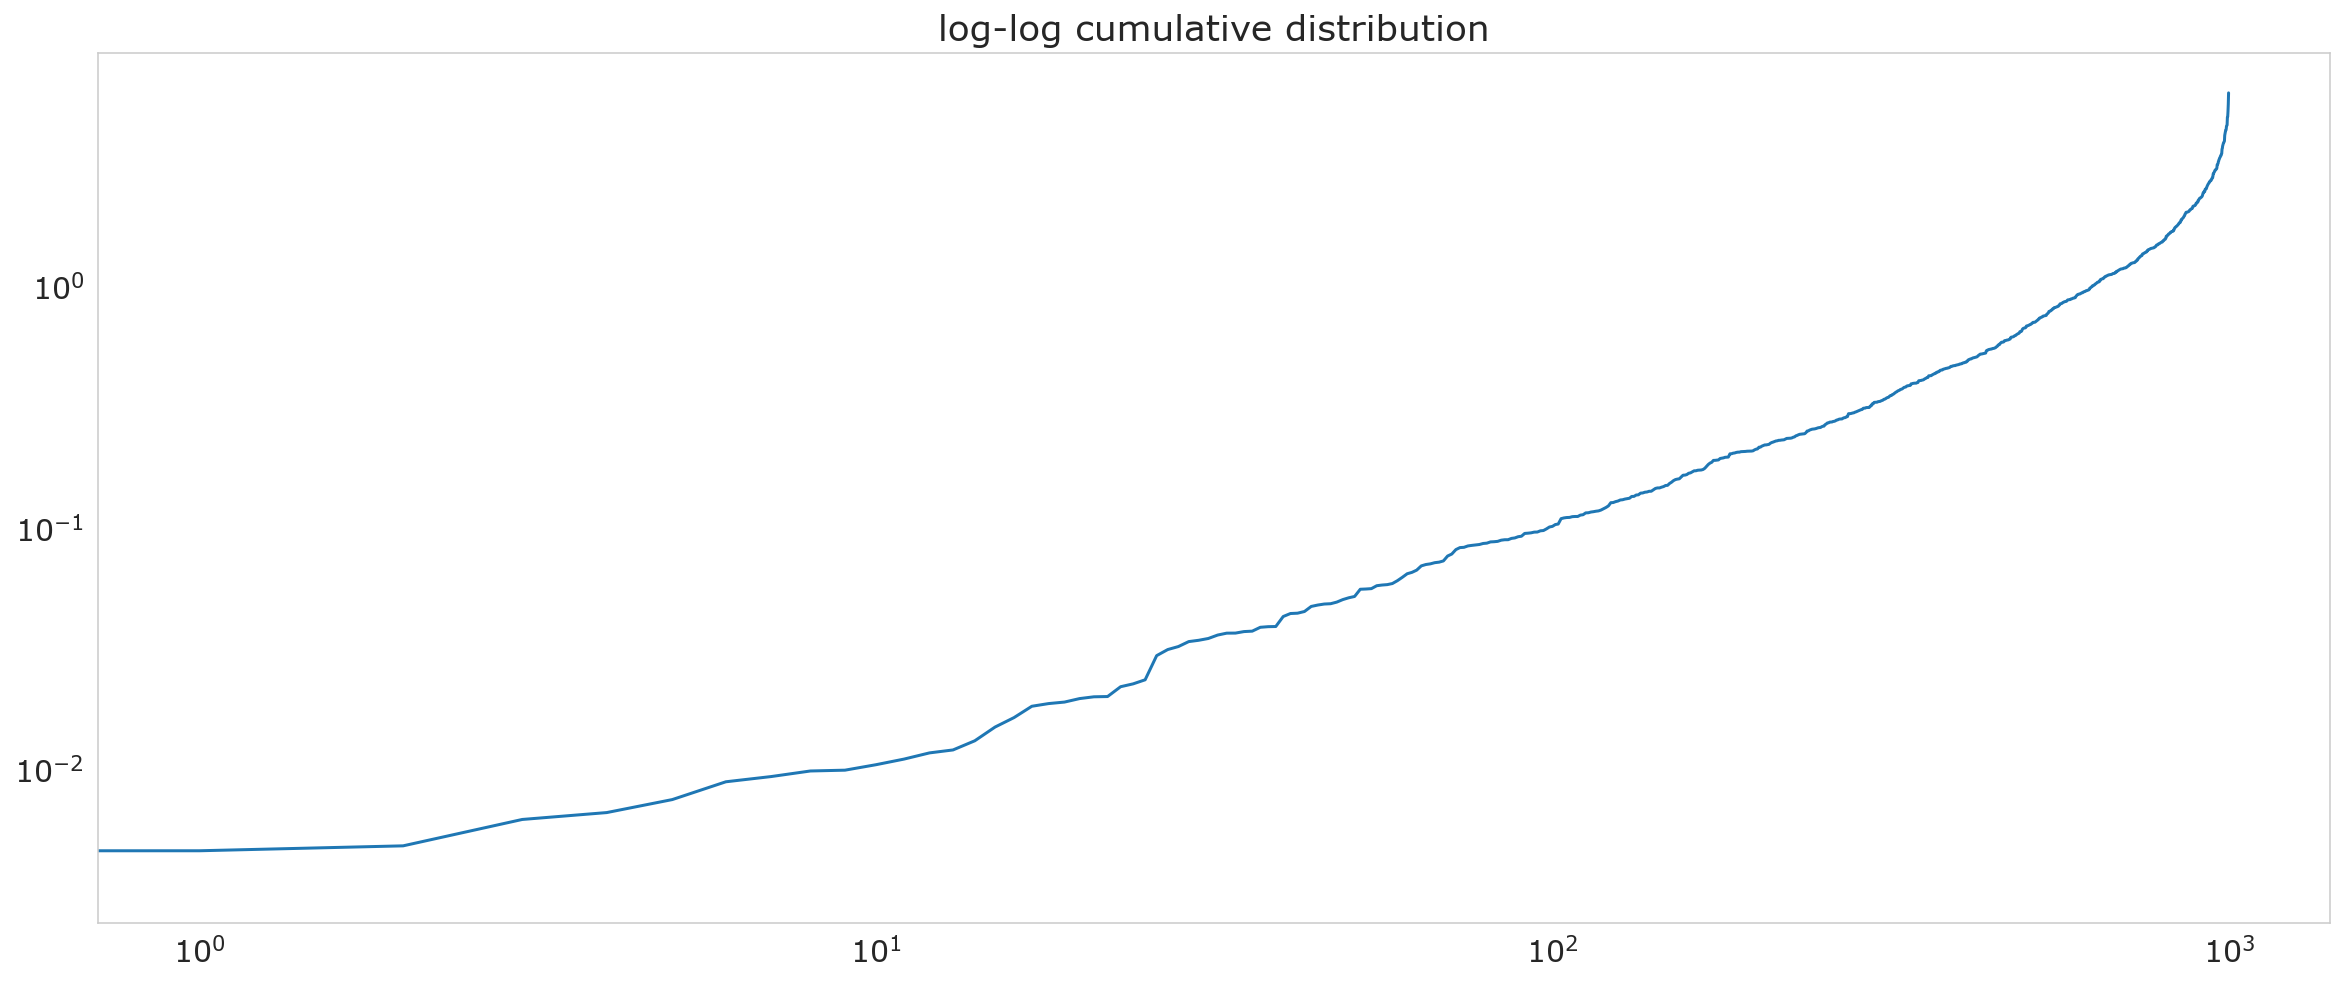

In [5]:
number_of_points_to_simulate = 1000
scale = 1.0

rnd_exp = np.random.exponential(scale=scale, size=number_of_points_to_simulate)

plt.plot(rnd_exp)
plt.title('random data')
plt.show()

plt.hist(rnd_exp, 50);
plt.title('histogram')
plt.show()

plt.hist(np.log10(rnd_exp), 50);
plt.title('logged histogram')
plt.show()

plt.plot(np.sort(rnd_exp))
plt.title('cumulative distribution')
plt.show()

plt.plot(np.sort(rnd_exp))
plt.xscale('log')
plt.yscale('log')
plt.title('log-log cumulative distribution')
plt.show()

## Finally there's the Poisson distribution, which is only defined at non-negative integer values. It captures how many times (counts) something happens within a certain period of time, or region of space.

## It also has the interesting propert that its mean is equal to its variance.

## This distribution is often used to model neural spiking.

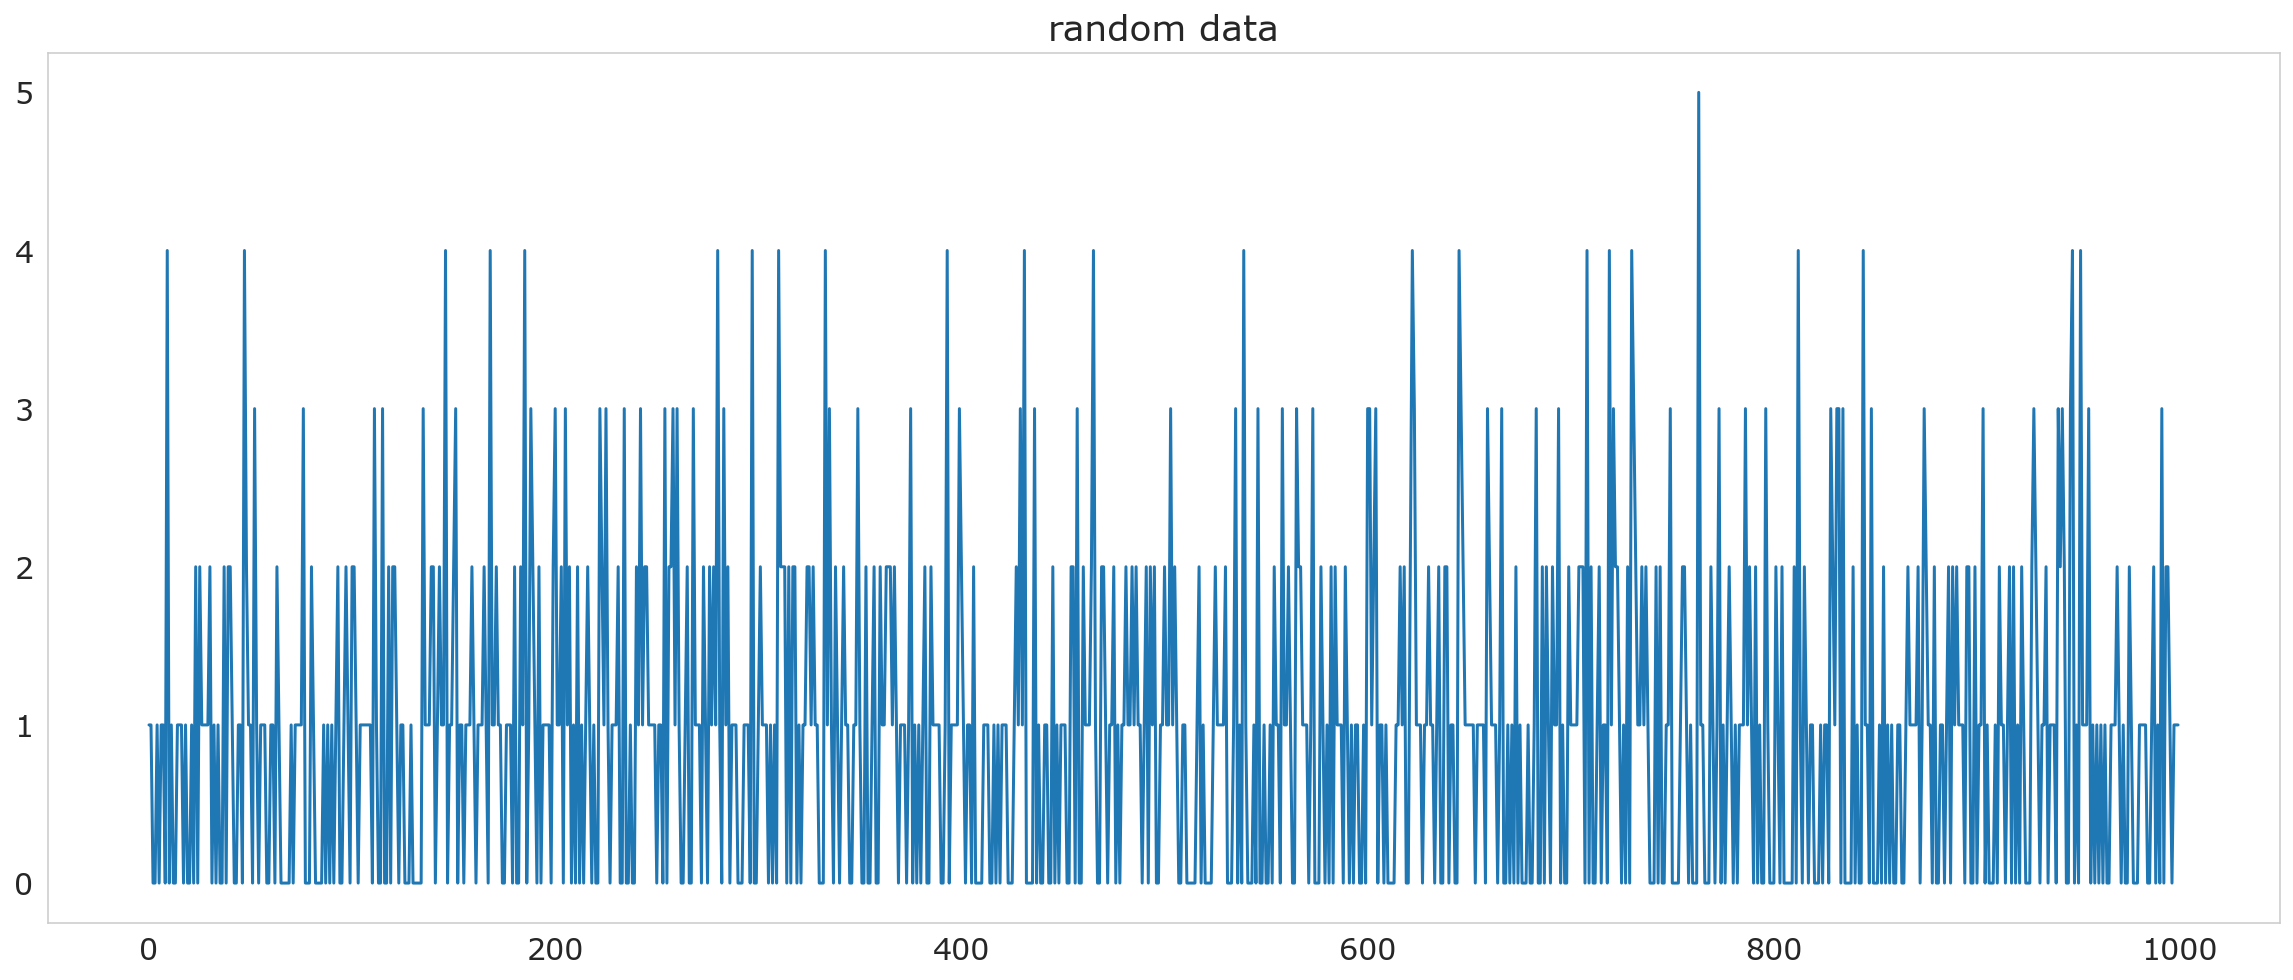

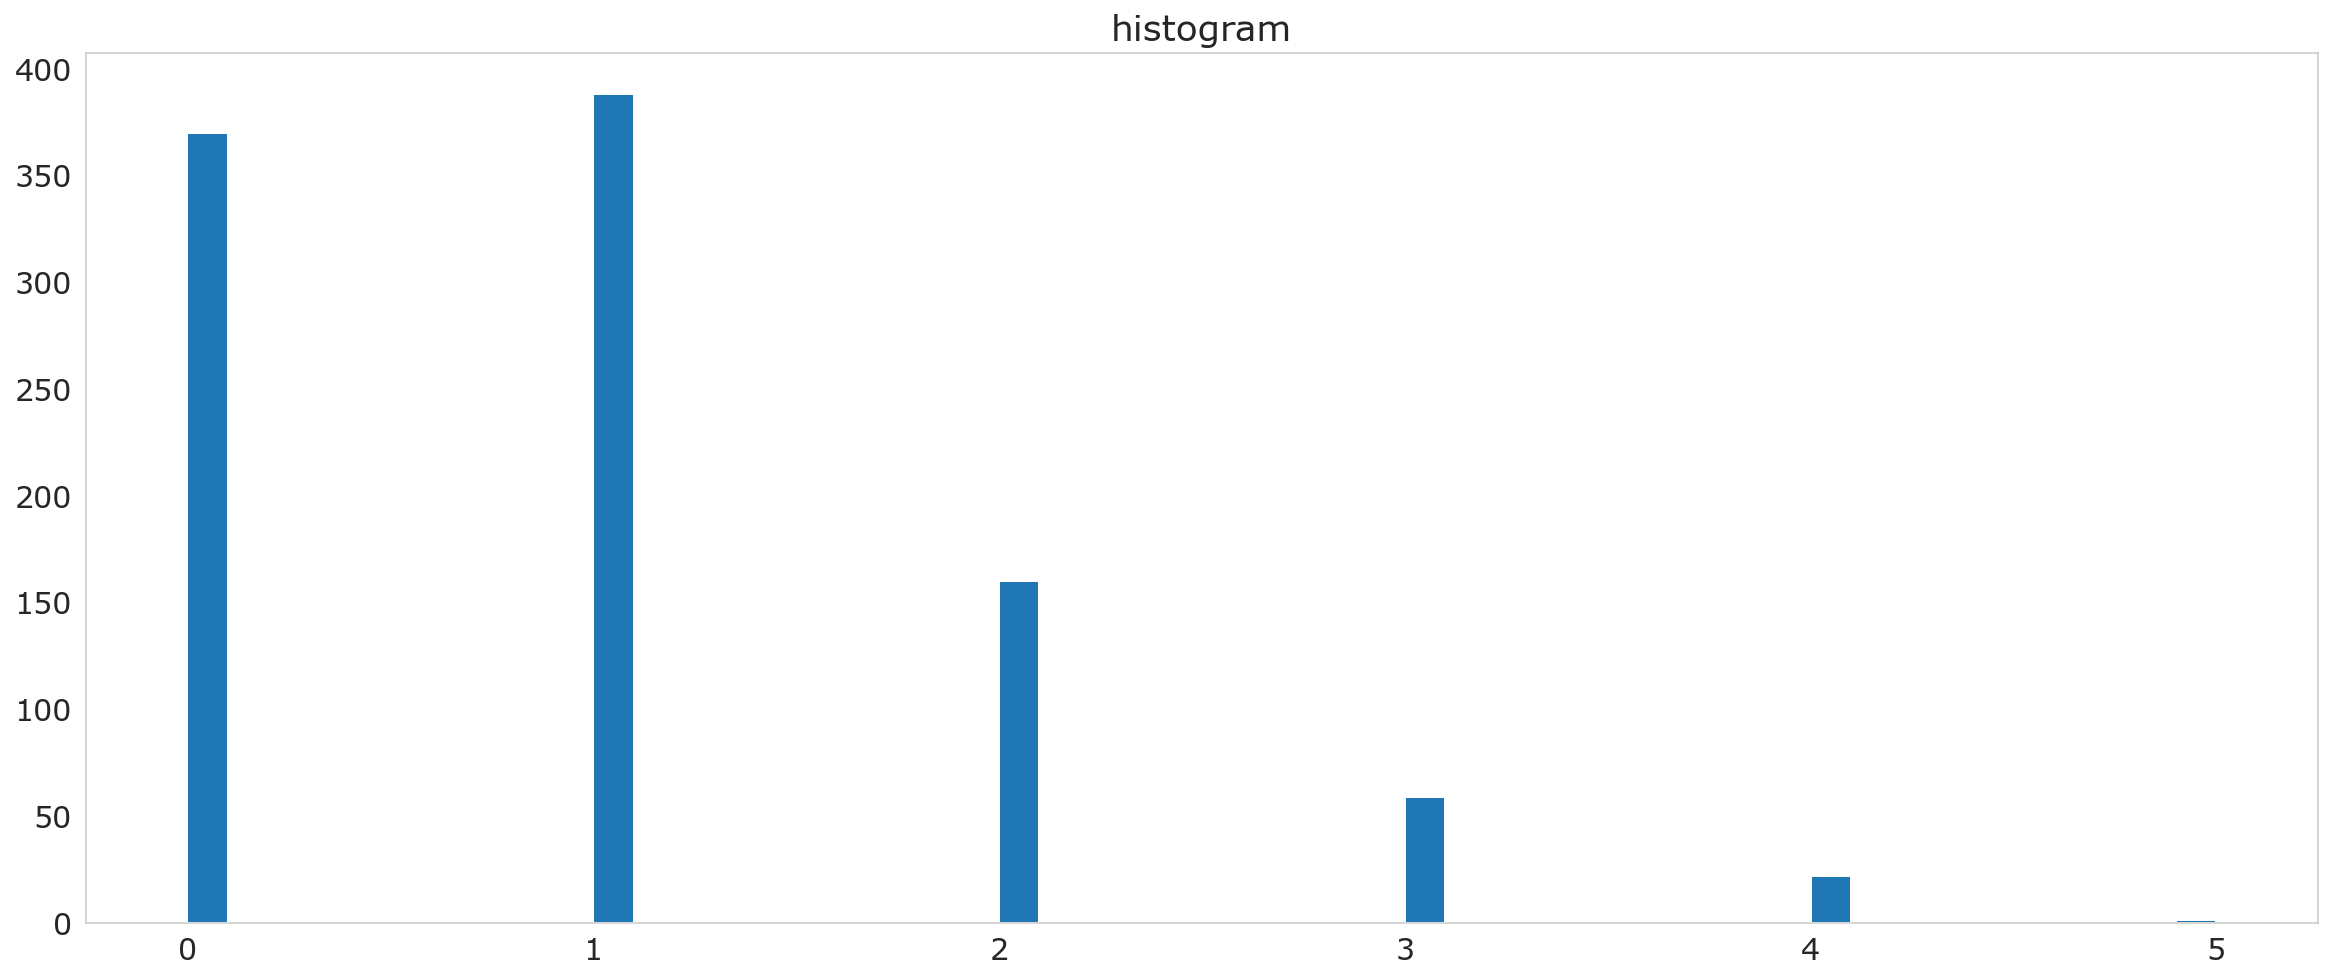

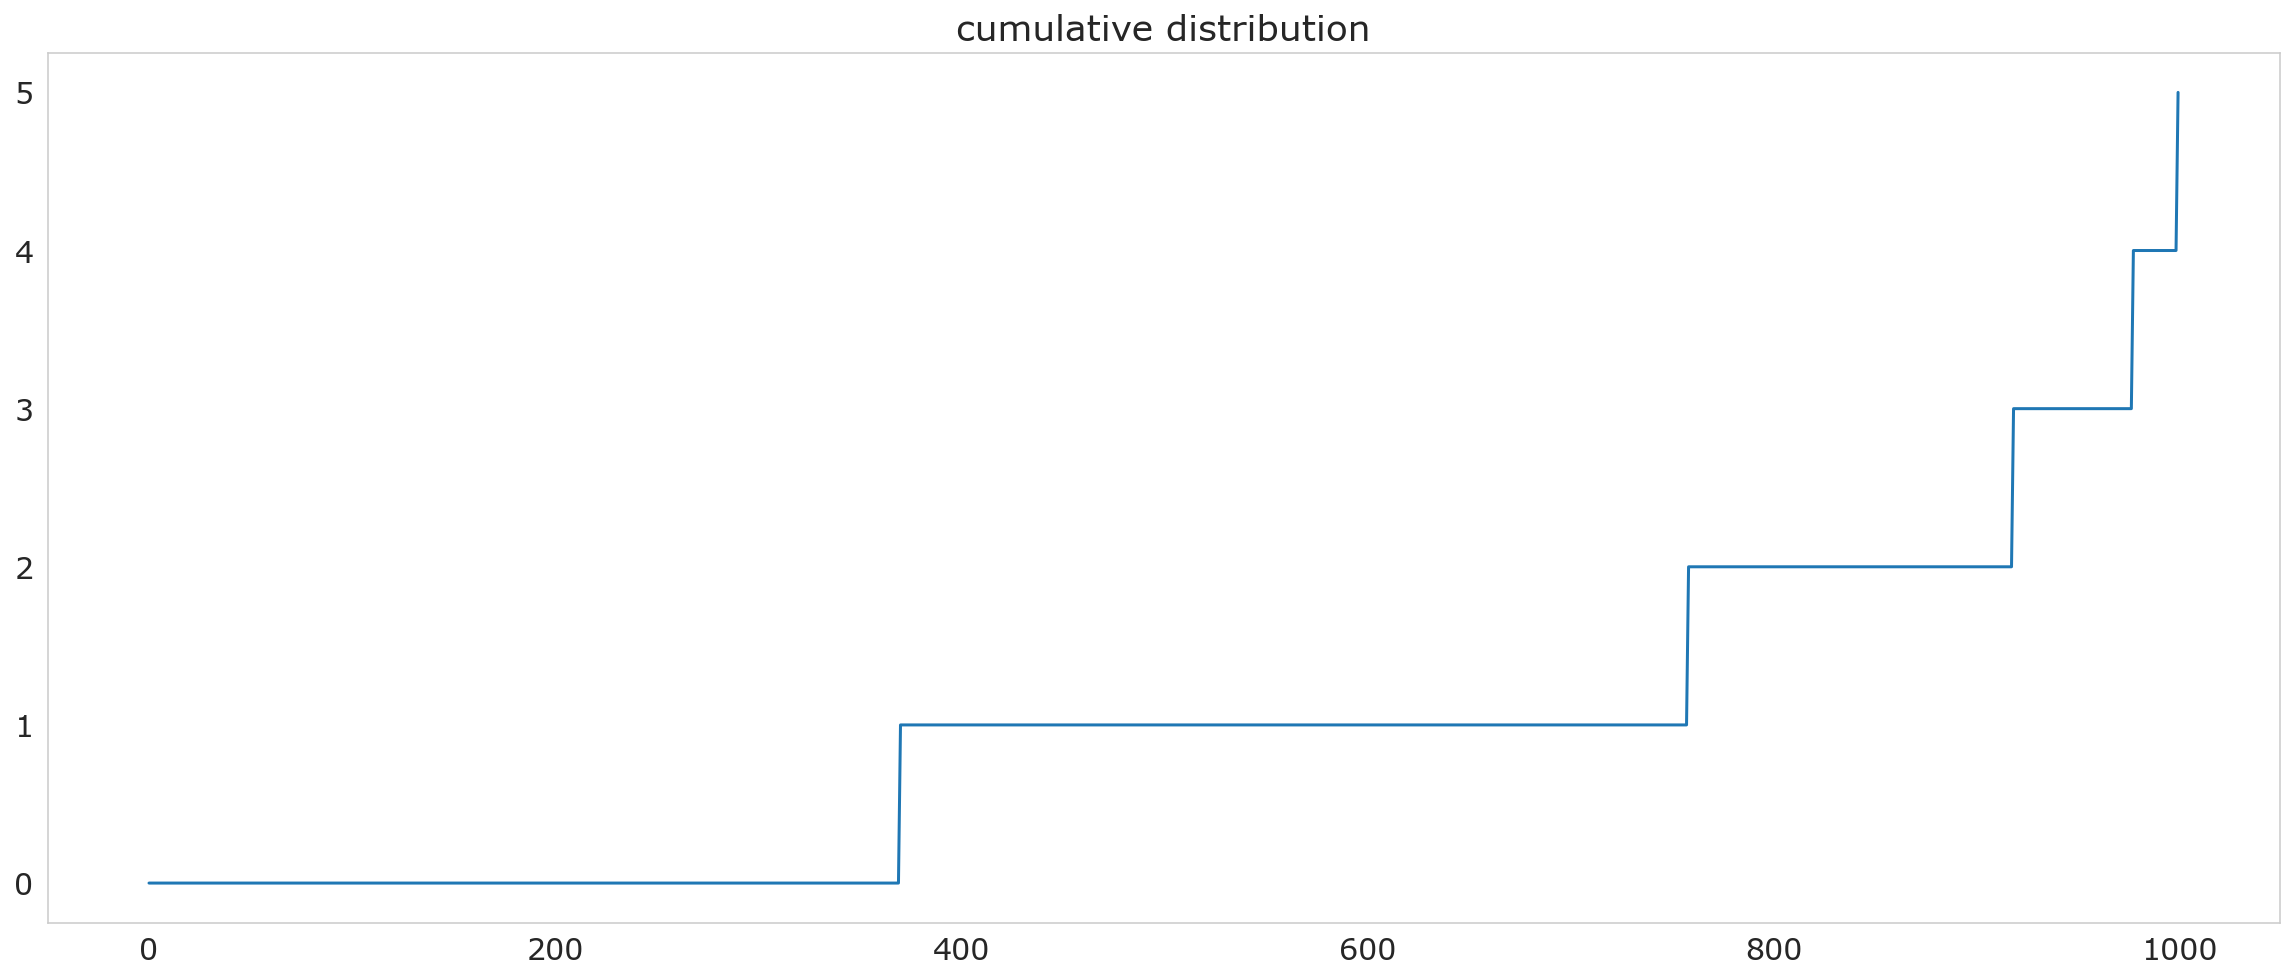

In [6]:
number_of_points_to_simulate = 1000
lamba = 1.0

rnd_poi = np.random.poisson(lam=lamba, size=number_of_points_to_simulate)

plt.plot(rnd_poi)
plt.title('random data')
plt.show()

plt.hist(rnd_poi, 50);
plt.title('histogram')
plt.show()

plt.plot(np.sort(rnd_poi))
plt.title('cumulative distribution')
plt.show()

## Okay, lets load in some fake data for people's heights, weights, and age. You'll see the files are called 'NBA' and 'NHL', meaning they're from NBA (basketball) players, and NHL (hockey) players. Players are well above average height, but the distribution is decidedly _not_ normal, because the NBA players strongly skew it.

In [7]:
csvfile = 'data/nba.csv'
nba = pd.read_csv(csvfile)

csvfile = 'data/nhl.csv'
nhl = pd.read_csv(csvfile)

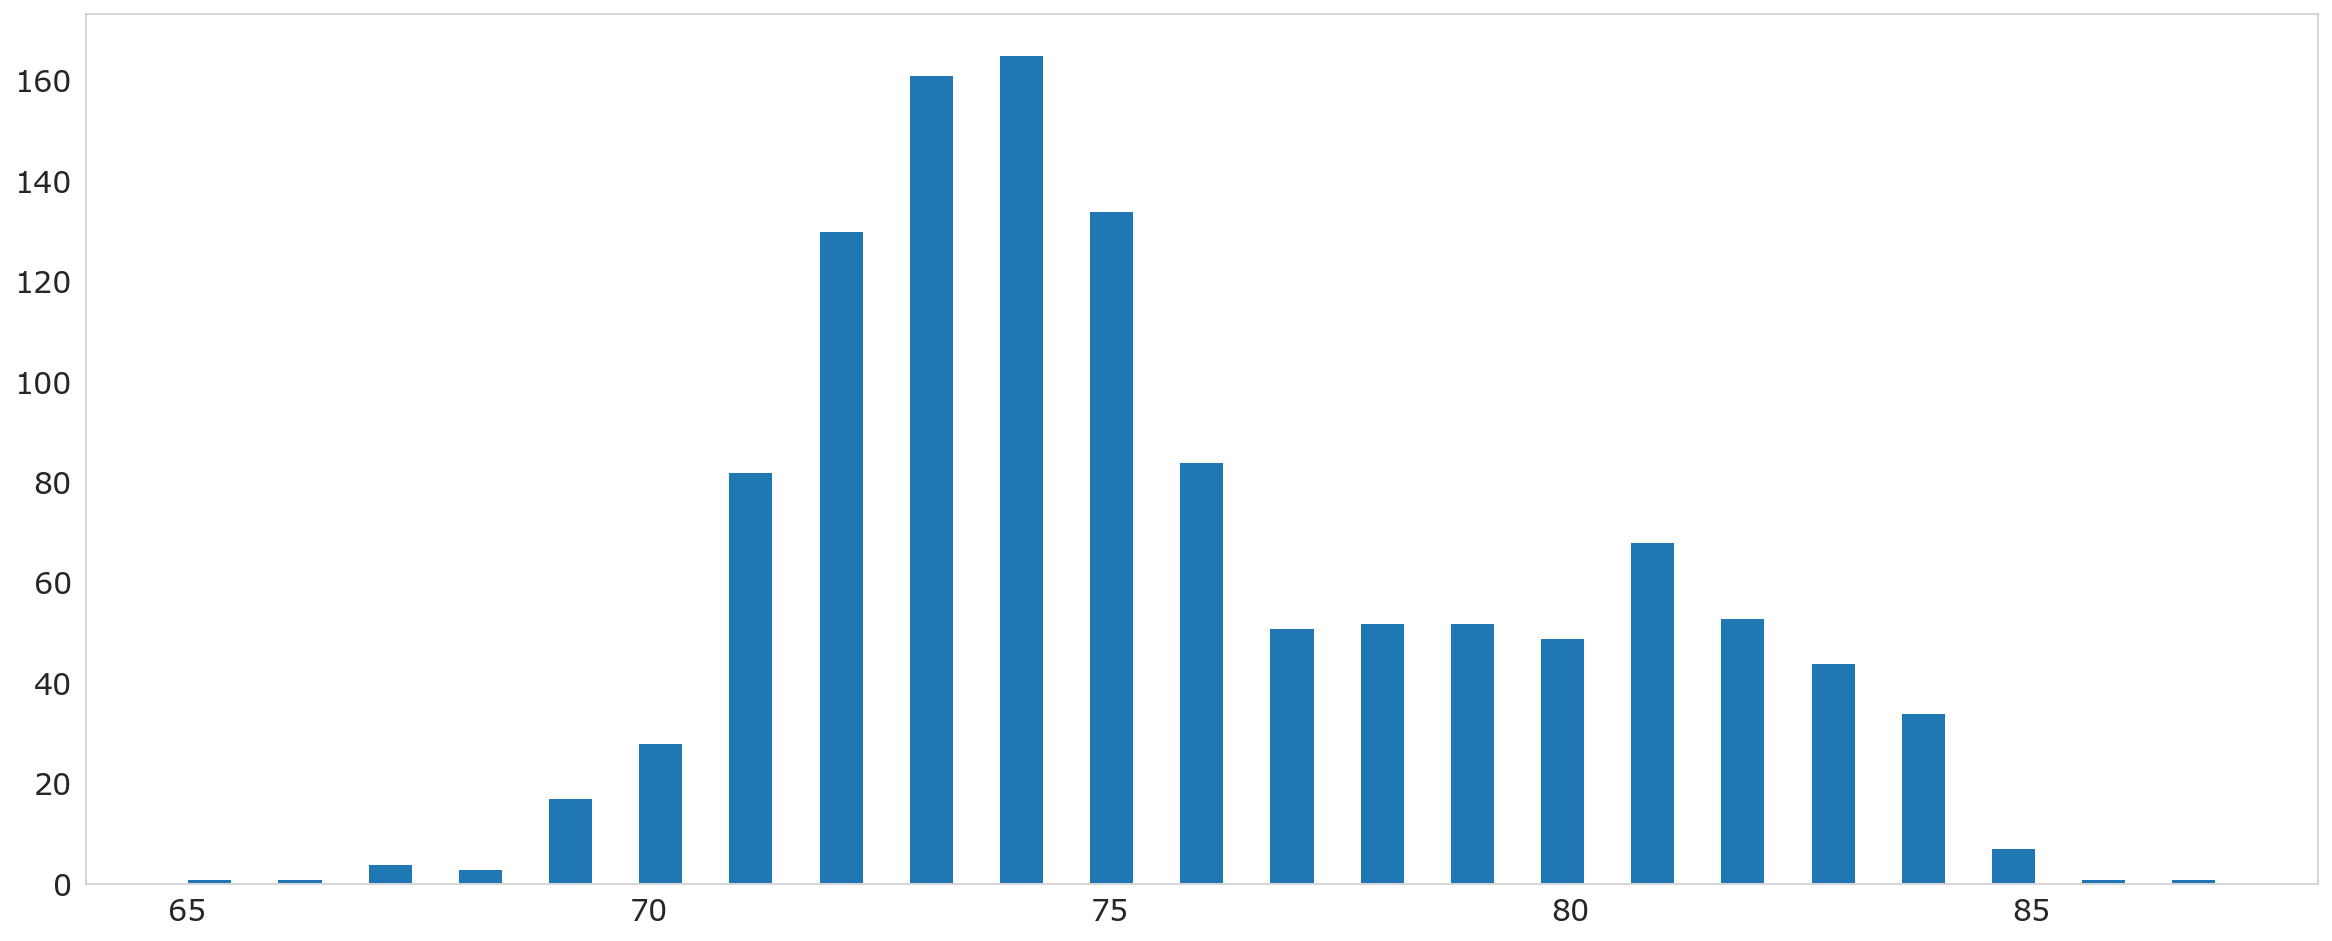

In [8]:
dat = nba.append([nhl])

plt.hist(dat['Height'], 45);

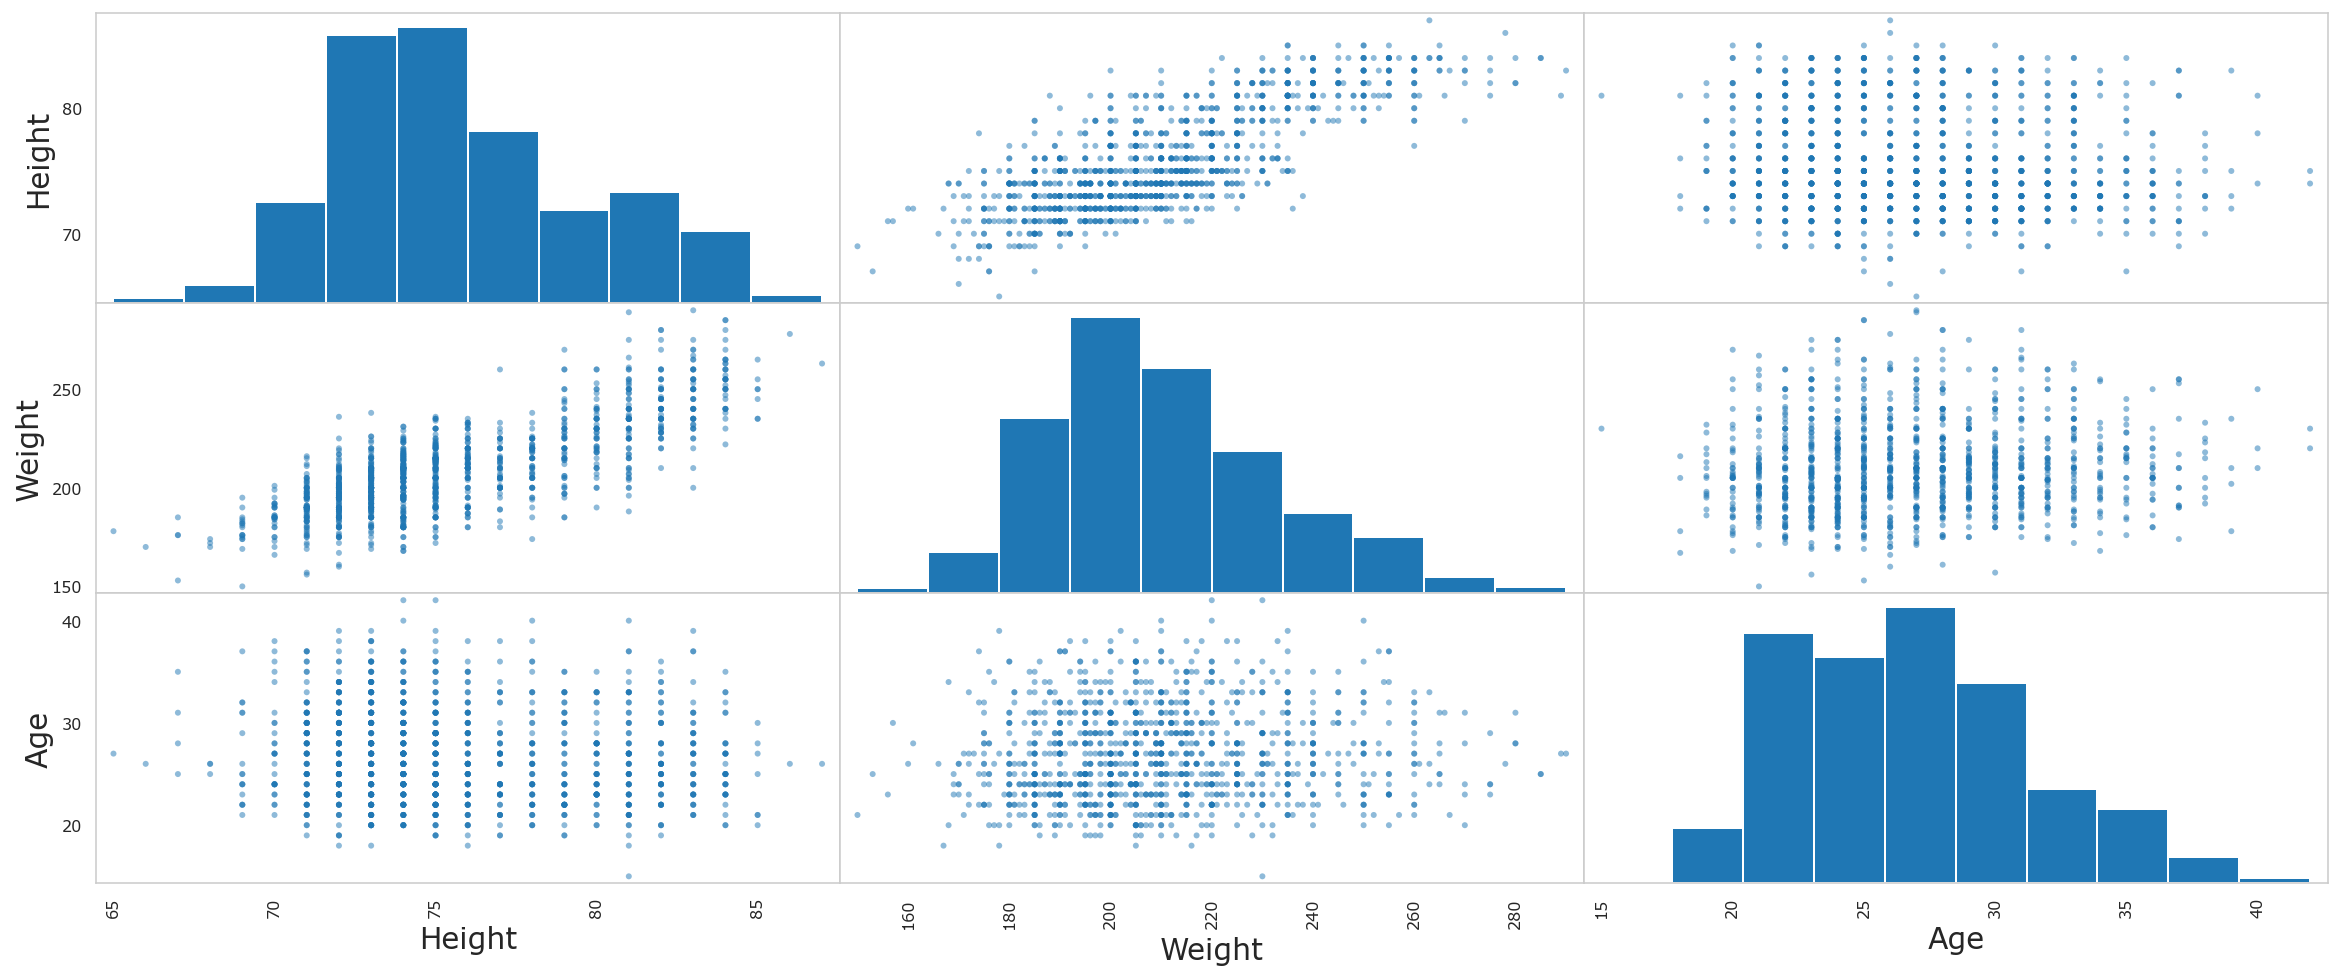

In [9]:
scatter_matrix(dat)
plt.show()